## Install Libraries

In [1]:
!pip install Quandl
!pip install investpy
!pip install tabulate
!pip install pandas_ta

     |████████████████████████████████| 4.4 MB 4.9 MB/s 
     |████████████████████████████████| 235 kB 31.0 MB/s 
     |████████████████████████████████| 6.4 MB 35.4 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=a597083f571feb42d20b46441bc7534878b69054727e65cb2f266ff7cc68a446
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 115 kB 3.4 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=e77d738299de3fc0e5e19441a001548645d99710410886d7cc3472a315adf9ba
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


### The Dataset is created in real-time as the notebook is run, this is because we are using the most upto-date dataset by generating it everytime we run the script. Hence, having the dataset prior to loading of the script is not necessary as we will be creating it in real-time.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import quandl
import investpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from tabulate import tabulate
import scipy.stats as st
import matplotlib.patches as mpl_patches
from scipy.stats import describe
import matplotlib.cm as cm
import matplotlib.lines as mlines
from scipy.stats import pearsonr
import scipy.stats as st
import matplotlib.patches as mpl_patches
from pandas.core.window.rolling import Rolling
import pandas_ta as ta
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler,MinMaxScaler,PowerTransformer
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import TimeSeriesSplit
import sklearn.metrics as metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from sklearn.linear_model import SGDRegressor,PassiveAggressiveRegressor
from datetime import datetime
import pytz
import shutil,os
import pickle
from sklearn.preprocessing import RobustScaler,MinMaxScaler,PowerTransformer,StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
URL_array  = set()
def link_extractor(URL, col_name, join_df, join=True, check_column=True, check_URL = True, clear_URL_array=False, show_details=False):

    print(f'processing {col_name}')
    if clear_URL_array is True:
        URL_array.clear()
    if join is False:
        join_df = None
        check_column=False
    col_name = col_name.lower().replace(',','').replace(" ", "_").replace(".", "_")


    if check_column==True and col_name in list(join_df.columns):
        print(f'column {col_name} already esists in dataframe, stopped here')
        return join_df

    elif check_URL==True and URL in list(URL_array):
        print(f'{URL} is already processed, stopped here')
        return join_df 

    page = requests.get(URL)
    soup = page.content
    soup = str(soup)
    scraped_output = (soup.split('[[')[1]).split('{labels')[0][0:-2]
    if show_details is True:
        print('head')
        print({scraped_output[0:30]})
        print('tail')
        print({scraped_output[-30:]})

    processed_str = scraped_output.replace('new Date(','')
    processed_str = processed_str.replace(')','')
    processed_str = processed_str.replace('[','')
    processed_str = processed_str.replace(']','')
    processed_str = processed_str.replace('"','')

    processed_str_list = processed_str.split(',')
    date_list,data_list = processed_str_list[::2],processed_str_list[1::2]

    if len(date_list)!=len(data_list):
        print(f'date & data length:{len(date_list),len(data_list),len(date_list)==len(data_list)}')

    if join is False:
        df = pd.DataFrame()
        df['Date'] = pd.to_datetime(date_list)
        df[col_name] = data_list
        URL_array.add(URL)
        if show_details == True:
            print('*'*100)
            print('df head')
            print(df.head(1))
            print('*'*100)
            print('df tail')
            print(df.tail(1))
            print('*'*100)
            print(f'df shape{df.shape}')
            print('='*100)
            
        return df

    elif col_name not in list(join_df.columns) and join == True:
        df = pd.DataFrame()
        df['Date'] = pd.to_datetime(date_list)
        df[col_name] = data_list
        join_df = pd.merge(join_df,df,on=['Date'],how='left')
        URL_array.add(URL)
        if show_details is True:
            print('*'*100)
            print('df head')
            print(df.head(1))
            print('*'*100)
            print('df tail')
            print(df.tail(1))
            print('*'*100)
            print(f'output df shape= {df.shape},joined_df shape = {join_df.shape}')
            print('='*100)
            print(f'Number of duplicate columns in dataframe {df.columns.duplicated().sum()}')
            print('='*100)
    
        return join_df

In [4]:
final_df = investpy.get_crypto_historical_data(crypto='bitcoin',from_date='01/01/2013',to_date='19/09/2021')
final_df = final_df.reset_index()
final_df.drop(['Currency','Volume'],inplace=True,axis=1)
final_df.columns = ['Date','opening_price','highest_price','lowest_price','closing_price']
final_df

,Date,opening_price,highest_price,lowest_price,closing_price
0,2013-01-01,13.5,13.6,13.2,13.3
1,2013-01-02,13.3,13.4,13.2,13.3
2,2013-01-03,13.3,13.5,13.3,13.4
3,2013-01-04,13.4,13.5,13.3,13.5
4,2013-01-05,13.5,13.6,13.3,13.4
...,...,...,...,...,...
3179,2021-09-15,47070.8,48436.5,46743.9,48130.6
3180,2021-09-16,48132.3,48480.6,47040.3,47748.0
3181,2021-09-17,47748.2,48155.9,46788.8,47282.8
3182,2021-09-18,47283.9,48761.0,47070.5,48306.7


In [5]:
final_df = link_extractor('https://bitinfocharts.com/comparison/bitcoin-transactions.html',
                   'transactions in blockchain', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/size-btc.html',
                   'avg block size', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/sentbyaddress-btc.html',
                   'sent by adress', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/bitcoin-difficulty.html',
                   'avg mining difficulty', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/bitcoin-hashrate.html',
                   'avg hashrate', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/bitcoin-mining_profitability.html',
                   'mining profitability', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/sentinusd-btc.html',
                   'Sent coins in USD', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/bitcoin-transactionfees.html',
                   'avg transaction fees', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/bitcoin-median_transaction_fee.html',
                   'median transaction fees', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/bitcoin-confirmationtime.html',
                   'avg block time', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/transactionvalue-btc.html',
                   'avg transaction value', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/mediantransactionvalue-btc.html',
                   'median transaction value', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/tweets-btc.html',
                   'tweets', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/google_trends-btc.html',
                   'google trends', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/activeaddresses-btc.html',
                   'active addresses', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/top100cap-btc.html',
                   'top100 to total percentage', join_df=final_df, join=True)
final_df = link_extractor('https://bitinfocharts.com/comparison/fee_to_reward-btc.html',
                   'avg fee to reward', join_df=final_df, join=True)

btc_in_circulation_df = quandl.get("BCHAIN/TOTBC",authtoken='9ztFCcK4_e1xGo_gjzK7')
btc_in_circulation_df = btc_in_circulation_df.rename(columns={'Value': 'number_of_coins_in_circulation'})
miners_revenue_df = quandl.get("BCHAIN/MIREV",authtoken='9ztFCcK4_e1xGo_gjzK7')
miners_revenue_df = miners_revenue_df.rename(columns={'Value': 'miner_revenue'})

processing transactions in blockchain
processing avg block size
processing sent by adress
processing avg mining difficulty
processing avg hashrate
processing mining profitability
processing Sent coins in USD
processing avg transaction fees
processing median transaction fees
processing avg block time
processing avg transaction value
processing median transaction value
processing tweets
processing google trends
processing active addresses
processing top100 to total percentage
processing avg fee to reward


In [6]:
final_df

,Date,opening_price,highest_price,lowest_price,closing_price,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,avg_hashrate,...,avg_transaction_fees,median_transaction_fees,avg_block_time,avg_transaction_value,median_transaction_value,tweets,google_trends,active_addresses,top100_to_total_percentage,avg_fee_to_reward
0,2013-01-01,13.5,13.6,13.2,13.3,31734,89033,26174,2979637,24331539528899,...,0.0107,0.0067,8.889,625.432,14.518,NaN,1.194,37846,19.536,0.627
1,2013-01-02,13.3,13.4,13.2,13.3,39280,114077,31809,2979637,22804647966378,...,0.0108,0.0066,9.412,650.617,14.514,NaN,1.497,43104,19.597,0.835
2,2013-01-03,13.3,13.5,13.3,13.4,42147,108023,38197,2979637,23724885599725,...,0.0118,0.00661,8.889,542.73,19.732,NaN,1.798,51268,19.621,0.925
3,2013-01-04,13.4,13.5,13.3,13.5,48436,141811,34990,2979637,22608181137438,...,0.0105,0.00661,9.412,632.431,11.384,NaN,1.841,47341,19.54,1
4,2013-01-05,13.5,13.6,13.3,13.4,39455,118240,38008,2979637,22590695489434,...,0.0105,0.00659,10.213,697.556,13.945,NaN,1.826,53417,19.543,0.885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,2021-09-15,47070.8,48436.5,46743.9,48130.6,268815,736726,500251,18415156832118,1.3302830209149E+20,...,3.018,0.863,10.141,702497,773.643,109407,89.096,823392,15.186,1.887
3180,2021-09-16,48132.3,48480.6,47040.3,47748.0,271087,817607,507192,18415156832118,1.302297111233E+20,...,2.966,0.808,10.588,766989,719.701,90855,86.404,879832,15.185,1.938
3181,2021-09-17,47748.2,48155.9,46788.8,47282.8,270893,720056,499224,18415156832118,1.272835239381E+20,...,2.631,0.712,9.796,612387,714.99,101046,81.131,823793,15.177,1.605
3182,2021-09-18,47283.9,48761.0,47070.5,48306.7,227506,563189,424384,18415156832118,1.4285050981775E+20,...,2.457,0.572,9.29,638205,593.076,82649,78.945,701986,15.185,1.183


In [7]:
final_df = final_df[(final_df['Date'] >= '2013-01-01')].reset_index(drop=True)
final_df = pd.merge(final_df,btc_in_circulation_df,on=['Date'],how='left')
final_df = pd.merge(final_df,miners_revenue_df,on=['Date'],how='left')
final_df['next_day_closing_price'] = final_df['closing_price'].shift(-1)
final_df.replace(to_replace='null', value=np.nan,inplace=True)
final_df.drop(final_df.tail(1).index,inplace=True)
final_df

,Date,opening_price,highest_price,lowest_price,closing_price,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,avg_hashrate,...,avg_transaction_value,median_transaction_value,tweets,google_trends,active_addresses,top100_to_total_percentage,avg_fee_to_reward,number_of_coins_in_circulation,miner_revenue,next_day_closing_price
0,2013-01-01,13.5,13.6,13.2,13.3,31734,89033,26174,2979637,24331539528899,...,625.432,14.518,NaN,1.194,37846,19.536,0.627,10621175.00,5.264860e+04,13.3
1,2013-01-02,13.3,13.4,13.2,13.3,39280,114077,31809,2979637,22804647966378,...,650.617,14.514,NaN,1.497,43104,19.597,0.835,10621575.00,5.486525e+04,13.4
2,2013-01-03,13.3,13.5,13.3,13.4,42147,108023,38197,2979637,23724885599725,...,542.73,19.732,NaN,1.798,51268,19.621,0.925,10628700.00,4.811833e+04,13.5
3,2013-01-04,13.4,13.5,13.3,13.5,48436,141811,34990,2979637,22608181137438,...,632.431,11.384,NaN,1.841,47341,19.54,1,10632425.00,5.087274e+04,13.4
4,2013-01-05,13.5,13.6,13.3,13.4,39455,118240,38008,2979637,22590695489434,...,697.556,13.945,NaN,1.826,53417,19.543,0.885,10633200.00,5.139673e+04,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,2021-09-14,44950.2,47247.6,44718.7,47077.5,267959,599399,491643,18415156832118,1.5551719497901E+20,...,1932378,717.117,91267,90.85,793939,15.218,1.394,18816150.00,4.946986e+07,48130.6
3179,2021-09-15,47070.8,48436.5,46743.9,48130.6,268815,736726,500251,18415156832118,1.3302830209149E+20,...,702497,773.643,109407,89.096,823392,15.186,1.887,18816862.50,4.302687e+07,47748.0
3180,2021-09-16,48132.3,48480.6,47040.3,47748.0,271087,817607,507192,18415156832118,1.302297111233E+20,...,766989,719.701,90855,86.404,879832,15.185,1.938,18817750.00,4.144786e+07,47282.8
3181,2021-09-17,47748.2,48155.9,46788.8,47282.8,270893,720056,499224,18415156832118,1.272835239381E+20,...,612387,714.99,101046,81.131,823793,15.177,1.605,18818662.50,4.500074e+07,48306.7


## Missing Value Imputation

In [8]:
missing_values = pd.DataFrame(final_df.isna().sum(),columns=['missing_count'])
missing_values.sort_values(by='missing_count',ascending=False)

,missing_count
tweets,519
active_addresses,22
top100_to_total_percentage,6
avg_block_time,1
Date,0
median_transaction_fees,0
miner_revenue,0
number_of_coins_in_circulation,0
avg_fee_to_reward,0
google_trends,0


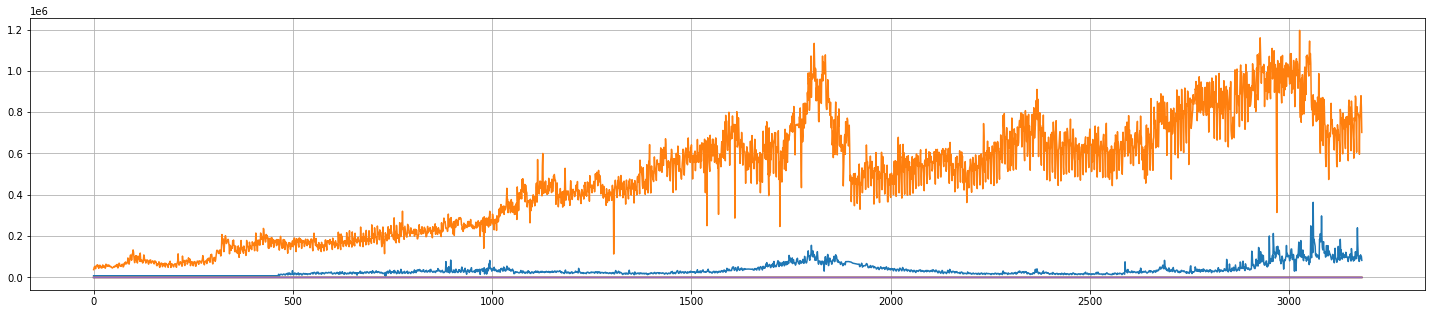

In [9]:
final_df['tweets'].fillna(final_df['tweets'].rolling(40, min_periods=1).mean()).bfill().astype(float).plot(x=final_df['Date'],y='tweets',figsize=(25,5),grid=True)
final_df['active_addresses'].fillna(final_df['active_addresses'].rolling(14, min_periods=1).mean()).astype(float).plot(x=final_df['Date'],y='active_addresses',figsize=(25,5),grid=True)
final_df['google_trends'].fillna(final_df['google_trends'].rolling(14, min_periods=1).mean()).astype(float).plot(x=final_df['Date'],y='google_trends',figsize=(25,5),grid=True)
final_df['top100_to_total_percentage'].fillna(final_df['top100_to_total_percentage'].rolling(7, min_periods=1).mean()).astype(float).plot(x=final_df['Date'],y='top100_to_total_percentage',figsize=(25,5),grid=True)
final_df['top100_to_total_percentage'] = final_df['top100_to_total_percentage'].fillna(final_df['top100_to_total_percentage'].rolling(7, min_periods=1).mean())
final_df['avg_block_time'].fillna(final_df['avg_block_time'].rolling(7, min_periods=1).mean()).astype(float).plot(x=final_df['Date'],y='avg_block_time',figsize=(25,5),grid=True)
final_df['avg_block_time'] = final_df['avg_block_time'].fillna(final_df['avg_block_time'].rolling(7, min_periods=1).mean())
final_df['google_trends'] = final_df['google_trends'].fillna(final_df['google_trends'].rolling(14, min_periods=1).mean())
final_df['active_addresses'] = final_df['active_addresses'].fillna(final_df['active_addresses'].rolling(14, min_periods=1).mean())
final_df['tweets'] = final_df['tweets'].fillna(final_df['tweets'].rolling(40, min_periods=1).mean()).bfill()

In [10]:
missing_values = pd.DataFrame(final_df.isna().sum(),columns=['missing_count'])
missing_values.sort_values(by='missing_count',ascending=False)

,missing_count
Date,0
median_transaction_fees,0
miner_revenue,0
number_of_coins_in_circulation,0
avg_fee_to_reward,0
top100_to_total_percentage,0
active_addresses,0
google_trends,0
tweets,0
median_transaction_value,0


In [11]:
final_df.to_csv('data_mod.csv',index=False)

In [12]:
!ls

data_mod.csv  sample_data


# EDA

In [13]:
df_nxt_cls = final_df[['Date', 'transactions_in_blockchain', 'avg_block_size', 'sent_by_adress',
                                            'avg_mining_difficulty','avg_hashrate','mining_profitability',
                                            'sent_coins_in_usd','avg_transaction_fees','median_transaction_fees',
                                            'avg_block_time','avg_transaction_value','median_transaction_value',
                                            'tweets','google_trends','active_addresses','top100_to_total_percentage','avg_fee_to_reward',
                                            'miner_revenue','number_of_coins_in_circulation','opening_price','highest_price','lowest_price',
                                            'closing_price','next_day_closing_price']]                  
df_nxt_cls

,Date,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,avg_hashrate,mining_profitability,sent_coins_in_usd,avg_transaction_fees,median_transaction_fees,...,active_addresses,top100_to_total_percentage,avg_fee_to_reward,miner_revenue,number_of_coins_in_circulation,opening_price,highest_price,lowest_price,closing_price,next_day_closing_price
0,2013-01-01,31734,89033,26174,2979637,24331539528899,2246,18839472,0.0107,0.0067,...,37846,19.536,0.627,5.264860e+04,10621175.00,13.5,13.6,13.2,13.3,13.3
1,2013-01-02,39280,114077,31809,2979637,22804647966378,2233,23851896,0.0108,0.0066,...,43104,19.597,0.835,5.486525e+04,10621575.00,13.3,13.4,13.2,13.3,13.4
2,2013-01-03,42147,108023,38197,2979637,23724885599725,2276,20921297,0.0118,0.00661,...,51268,19.621,0.925,4.811833e+04,10628700.00,13.3,13.5,13.3,13.4,13.5
3,2013-01-04,48436,141811,34990,2979637,22608181137438,2259,29527613,0.0105,0.00661,...,47341,19.54,1,5.087274e+04,10632425.00,13.4,13.5,13.3,13.5,13.4
4,2013-01-05,39455,118240,38008,2979637,22590695489434,2074,26851599,0.0105,0.00659,...,53417,19.543,0.885,5.139673e+04,10633200.00,13.5,13.6,13.3,13.4,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,2021-09-14,267959,599399,491643,18415156832118,1.5551719497901E+20,0.315,383329472546,2.548,0.72,...,793939,15.218,1.394,4.946986e+07,18816150.00,44950.2,47247.6,44718.7,47077.5,48130.6
3179,2021-09-15,268815,736726,500251,18415156832118,1.3302830209149E+20,0.323,48228727220,3.018,0.863,...,823392,15.186,1.887,4.302687e+07,18816862.50,47070.8,48436.5,46743.9,48130.6,47748.0
3180,2021-09-16,271087,817607,507192,18415156832118,1.302297111233E+20,0.319,42137524406,2.966,0.808,...,879832,15.185,1.938,4.144786e+07,18817750.00,48132.3,48480.6,47040.3,47748.0,47282.8
3181,2021-09-17,270893,720056,499224,18415156832118,1.272835239381E+20,0.349,29613757834,2.631,0.712,...,823793,15.177,1.605,4.500074e+07,18818662.50,47748.2,48155.9,46788.8,47282.8,48306.7


In [14]:
def plot_data(df,feature_name,exclude_feature='next_day_closing_price'):
    random_color = (random.random(), random.random(), random.random())
    df.plot(x='Date',y=feature_name,figsize=(25,5),grid=True,color=random_color)
    plt.title(f'Date VS {feature_name.replace("_"," ")}')
    plt.ylabel(feature_name)
    plt.show()

    df.plot(kind='kde',y=feature_name,figsize=(25,5),grid=True,color=random_color)
    plt.title(f'KDE-{feature_name.replace("_"," ")}')
    plt.show()

    corr = df.corr().loc[[feature_name],:].sort_values(by=feature_name,axis=1).drop(columns=[feature_name,exclude_feature])
    plt.figure(figsize = (25,5))
    sns.heatmap(corr,cmap='tab10',square=True,annot=True,cbar=False,annot_kws={"fontsize":16},linewidths=1, linecolor='black',)
    plt.title(f'Correlation with other features')
    plt.show()
    
def plot_scatter(df,scatter_list,scatter_with):
    fig,axs = plt.subplots(1,len(scatter_list),sharey=False,figsize=(7*len(scatter_list),7))
    colors = plt.rcParams["axes.prop_cycle"]()
    for i,feat in enumerate(scatter_list):
        x = sorted(list(df[scatter_with]))
        y = sorted(list(df[feat]))

        axs[i].scatter(x,y,marker=".",color=next(colors)["color"],label=feat)

        line = mlines.Line2D([0, 1], [0, 1], color='black',linestyle=':',label='Normal Line')
        transform = axs[i].transAxes
        line.set_transform(transform)
        axs[i].add_line(line)
        axs[i].set_ylabel(feat)
        axs[i].grid()
        axs[i].set_xlabel(scatter_with)
        axs[i].legend()
    plt.show()

In [15]:
df_nxt_cls.dtypes

Date                              datetime64[ns]
transactions_in_blockchain                object
avg_block_size                            object
sent_by_adress                            object
avg_mining_difficulty                     object
avg_hashrate                              object
mining_profitability                      object
sent_coins_in_usd                         object
avg_transaction_fees                      object
median_transaction_fees                   object
avg_block_time                            object
avg_transaction_value                     object
median_transaction_value                  object
tweets                                    object
google_trends                             object
active_addresses                          object
top100_to_total_percentage                object
avg_fee_to_reward                         object
miner_revenue                            float64
number_of_coins_in_circulation           float64
opening_price       

In [16]:
df_nxt_cls["transactions_in_blockchain"] = df_nxt_cls['transactions_in_blockchain'].astype('float64')
df_nxt_cls["avg_block_size"] = df_nxt_cls['avg_block_size'].astype('float64')
df_nxt_cls["sent_by_adress"] = df_nxt_cls['sent_by_adress'].astype('float64')
df_nxt_cls["avg_mining_difficulty"] = df_nxt_cls['avg_mining_difficulty'].astype('float64')
df_nxt_cls["avg_hashrate"] = df_nxt_cls['avg_hashrate'].astype('float64')
df_nxt_cls["mining_profitability"] = df_nxt_cls['mining_profitability'].astype('float64')
df_nxt_cls["sent_coins_in_usd"] = df_nxt_cls['sent_coins_in_usd'].astype('float64')
df_nxt_cls["avg_transaction_fees"] = df_nxt_cls['avg_transaction_fees'].astype('float64')
df_nxt_cls["median_transaction_fees"] = df_nxt_cls['median_transaction_fees'].astype('float64')
df_nxt_cls["avg_block_time"] = df_nxt_cls['avg_block_time'].astype('float64')
df_nxt_cls["avg_transaction_value"] = df_nxt_cls['avg_transaction_value'].astype('float64')
df_nxt_cls["median_transaction_value"] = df_nxt_cls['median_transaction_value'].astype('float64')
df_nxt_cls["tweets"] = df_nxt_cls['tweets'].astype('float64')
df_nxt_cls["google_trends"] = df_nxt_cls['google_trends'].astype('float64')
df_nxt_cls["active_addresses"] = df_nxt_cls['active_addresses'].astype('float64')
df_nxt_cls["top100_to_total_percentage"] = df_nxt_cls['top100_to_total_percentage'].astype('float64')
df_nxt_cls["avg_fee_to_reward"] = df_nxt_cls['avg_fee_to_reward'].astype('float64')

## Next Day Closing Price

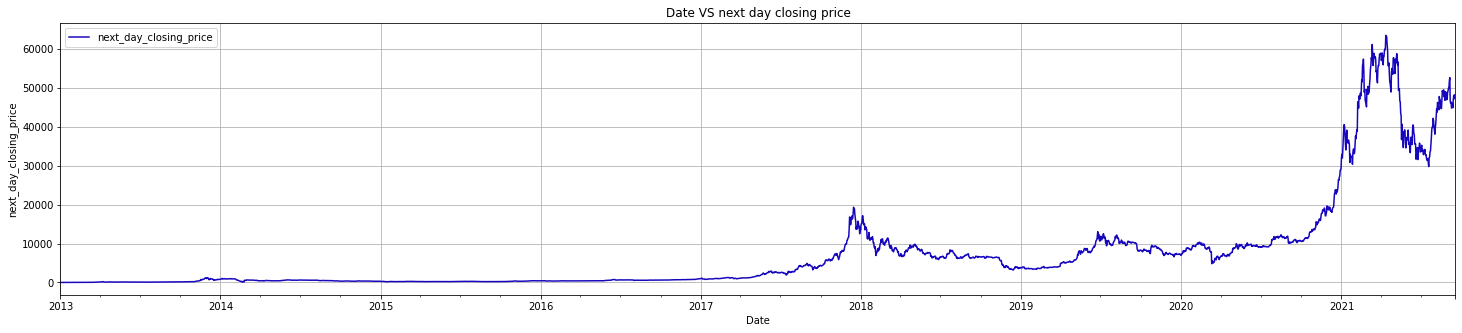

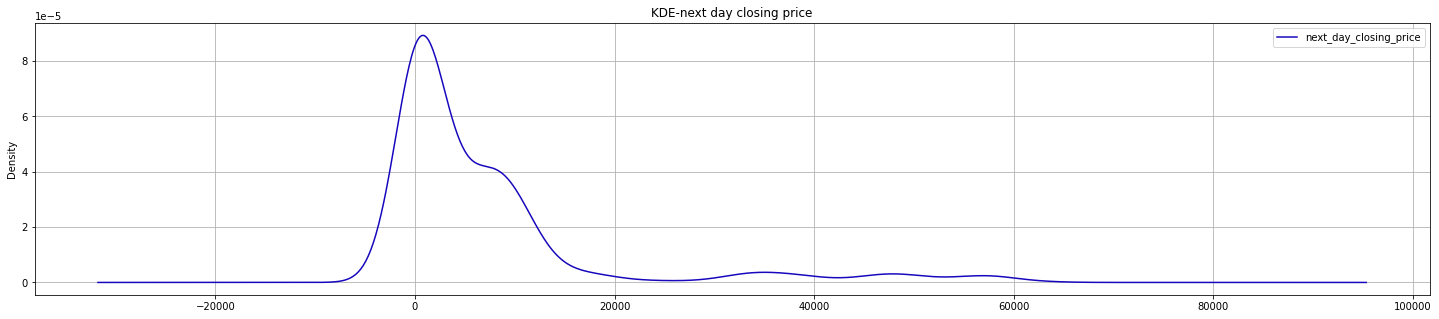

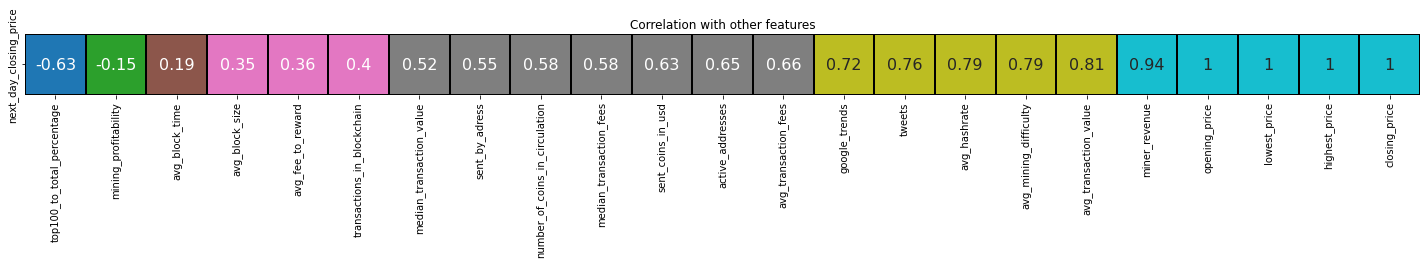

In [17]:
plot_data(df_nxt_cls, feature_name='next_day_closing_price')

1) The distribution is right skewed
2) The prices are volatile. They were stable from 2013 to 2017. Then there is a vast increase. The prices were stable for some time.After 2020 the prices have increased heavily but yet again they saw some decrease
3) Miner revenue, which includes both transaction fees and rewards, is well correlated with price.

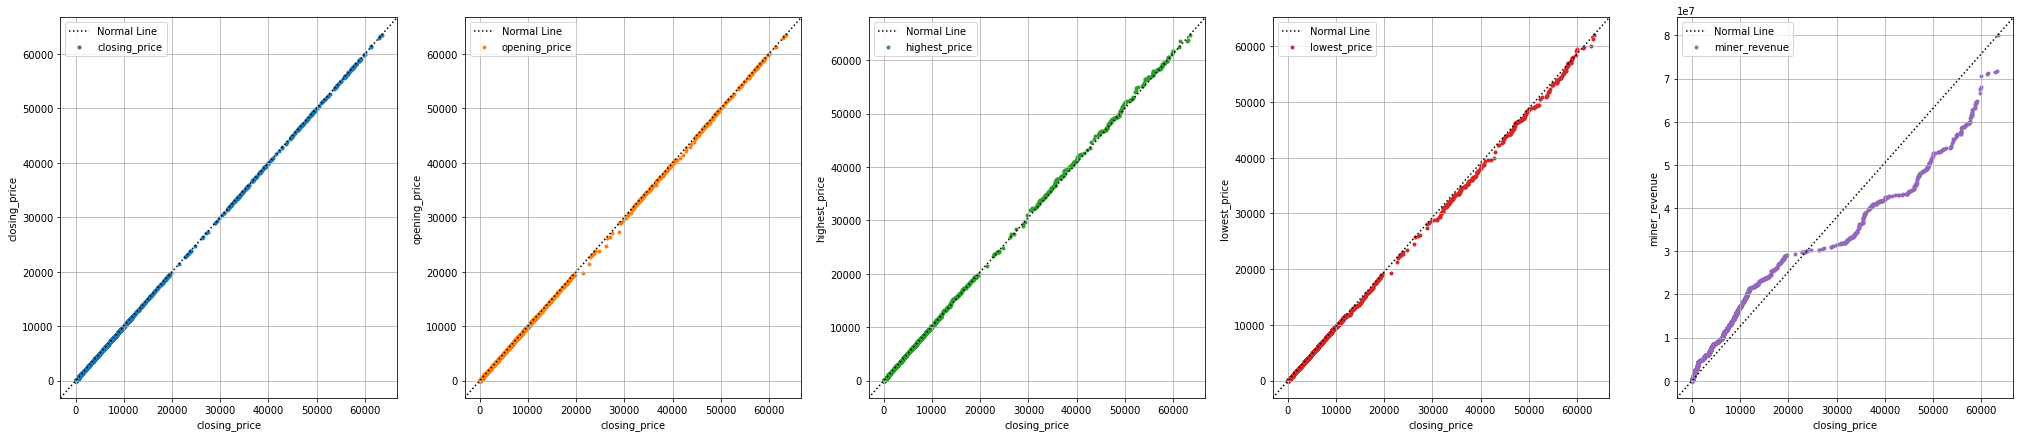

In [18]:
scatter_list = ['closing_price','opening_price','highest_price','lowest_price','miner_revenue']
plot_scatter(df_nxt_cls, scatter_list, 'closing_price')

1. We can observe that miner-revenue was initially higher when Bitcoin was still not so popular, and suddenly the revenue for mining took a huge hit after Bitcoin boomed in popularity. Since miner-revenue is important as an incentive for people, it is an important indicator of the price of the cryptocurrency.

## Average Mining Difficulty

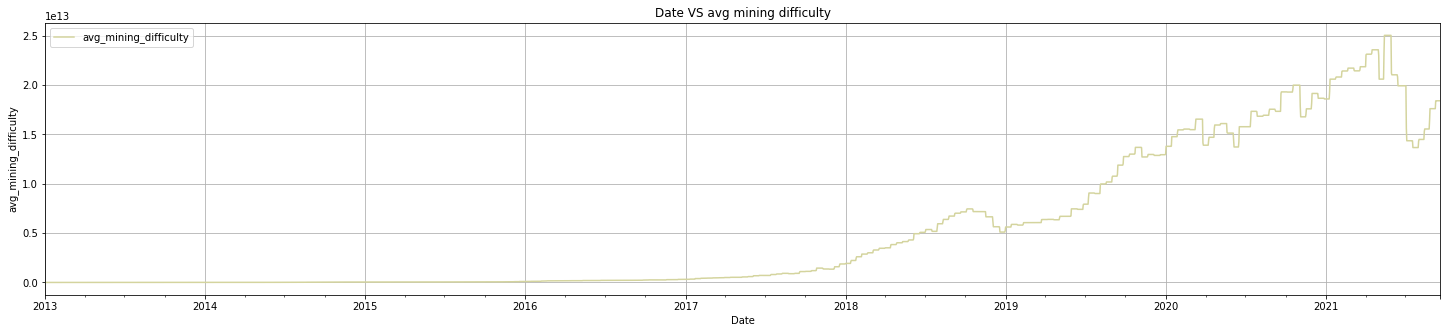

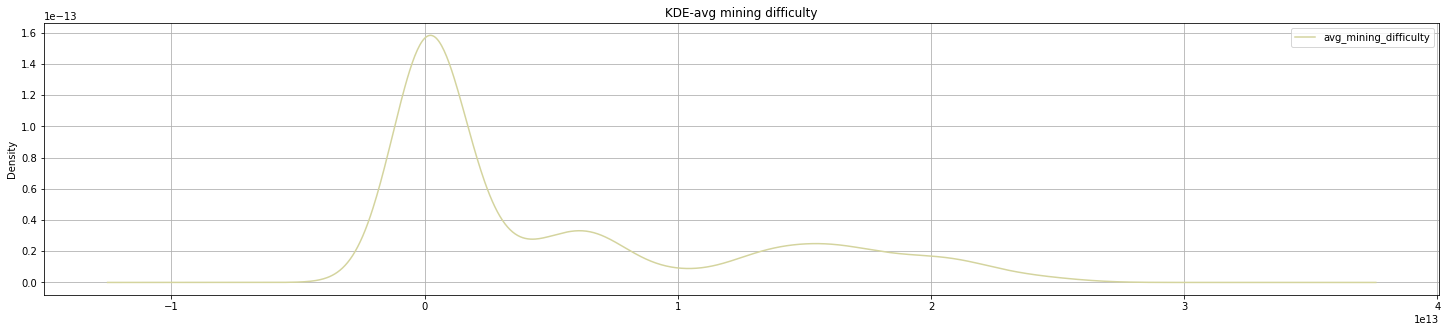

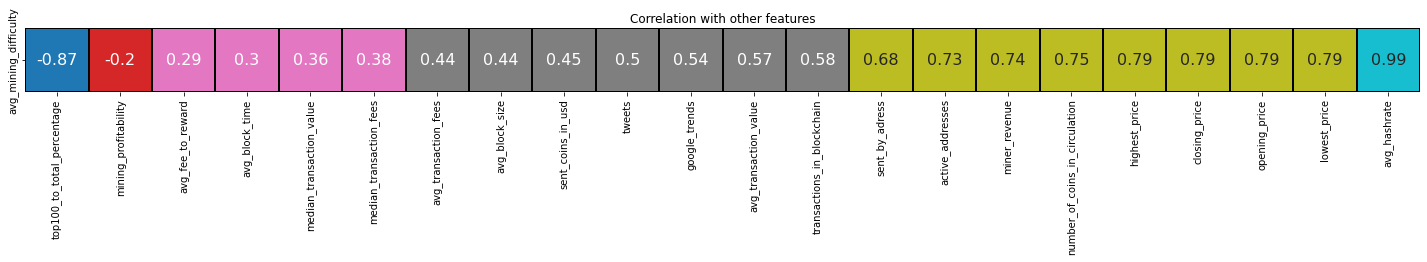

In [19]:
plot_data(df_nxt_cls, feature_name='avg_mining_difficulty')

1. The difficulty level reflects how difficult the proof of work calculation with respect to the difficulty value set at the beginning, i.e., 1. 

2. A high difficulty means that it will take more computing power to mine the same number of blocks, making the network more secure against attacks.

3. The difficulty is adjusted every 2016 blocks (every 2 weeks approximately) so that the average time between each block remains 10 minutes. 

4. It will be increased if more number of blocks are being created within a 2-week period and will be reduced if less number of blocks are created.

## Average Block Size

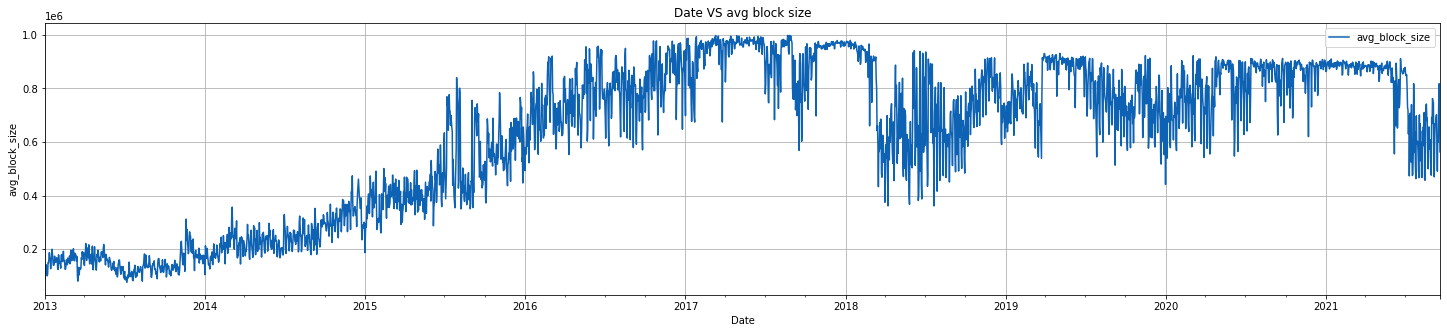

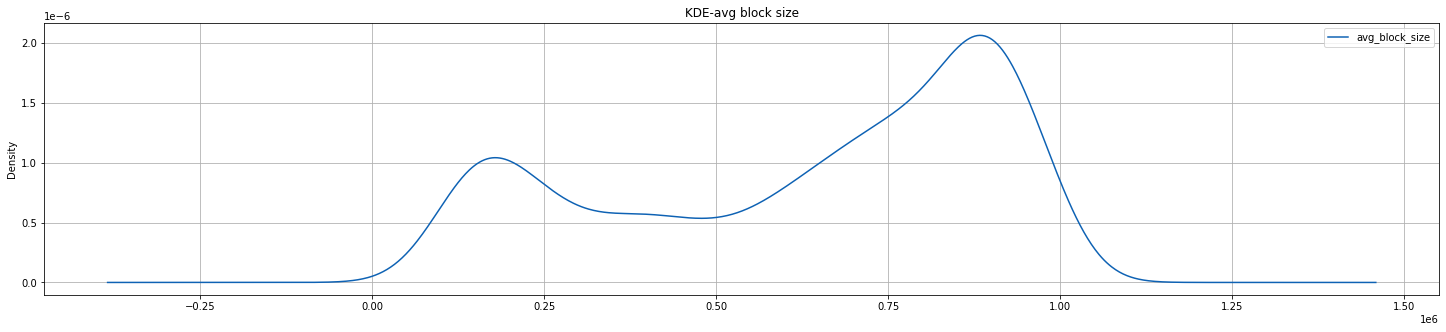

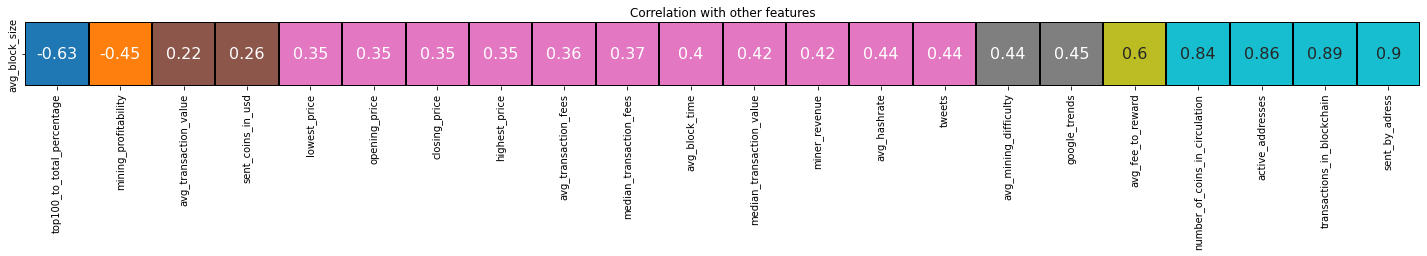

In [20]:
plot_data(df_nxt_cls, feature_name='avg_block_size')

1. Blocks are files where transactional information related to the Bitcoin network is permanently recorded, i.e. once written, it cannot be altered or removed.

2. It records the most recent Bitcoin transactions that have not yet entered in any prior blocks. Thus, a block is like a page of a ledger. Each time a block is ‘completed’, it gives way to the next block in the blockchain. 

3. Block size follows similar trends to the number of transactions. Which is also visible from its correlation with the number of transactions.

4. The increase over time can be linked with gain in popularity of bitcoin.

## Average Hashrate

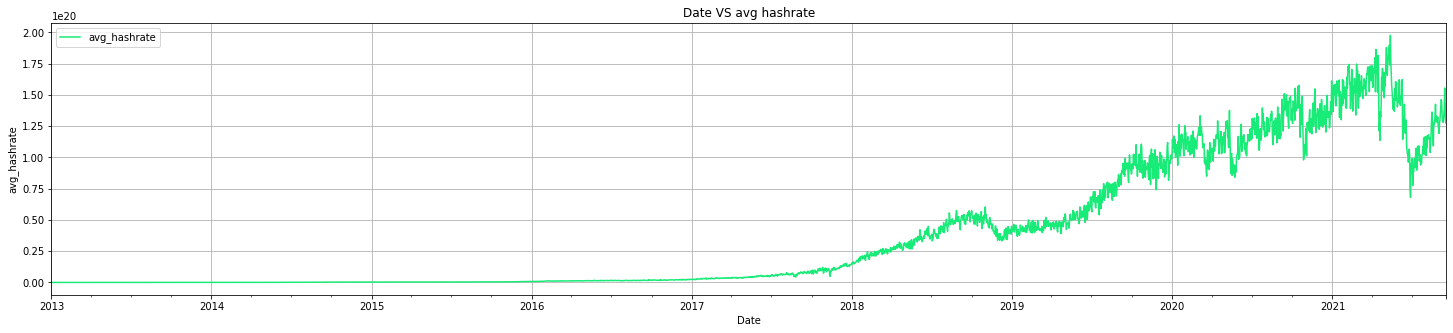

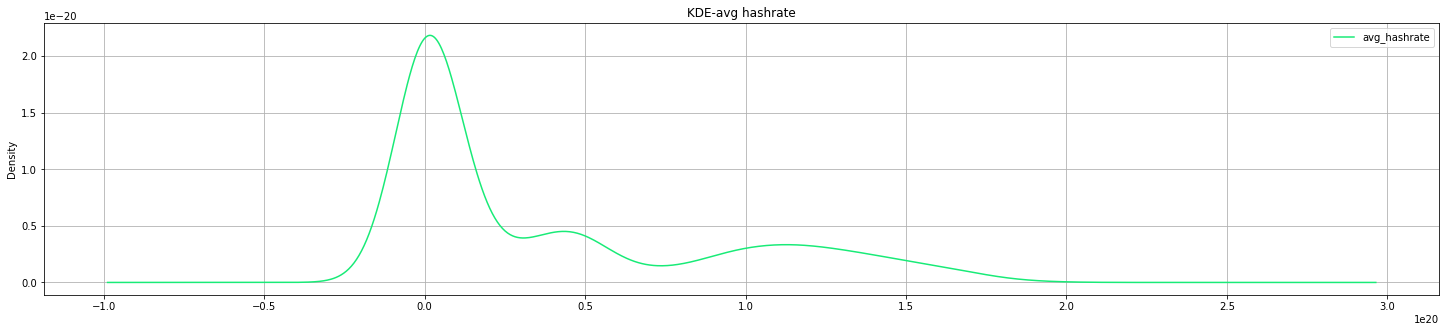

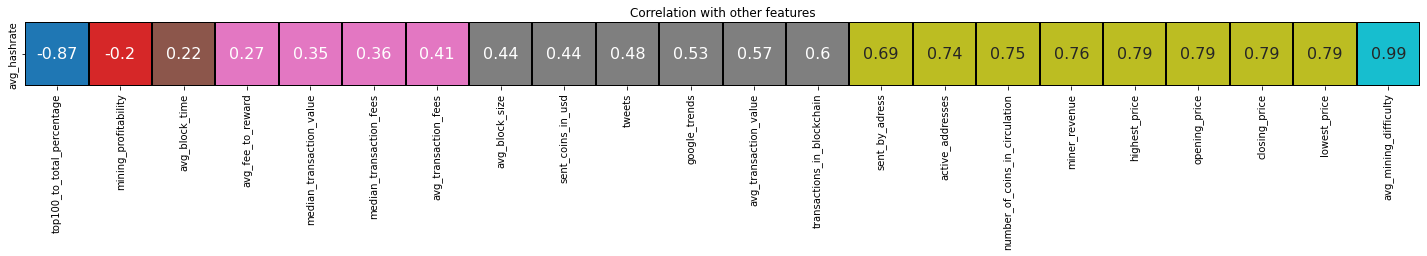

In [21]:
plot_data(df_nxt_cls, feature_name='avg_hashrate')

1. The measure of the computation power used per second during mining is called hashrate. The unit of measurement is hash/sec. This denotes the number of calculations that can be performed per second.


2. Higher hashrate means that the machine can process a lot of data in a single second.
3. Mining difficulty directly depends on hash rate

### Observations


1. The trend of the graph is similar to that of mining difficulty, as mining difficulty and hashrate are correlated. 
   
2. More people starting to mine, required more hash power per day which basically leads to increased difficulty. 
3. Hashrate increased from 2016 and fell in 2018, when the prices declined.

## Average transaction fees

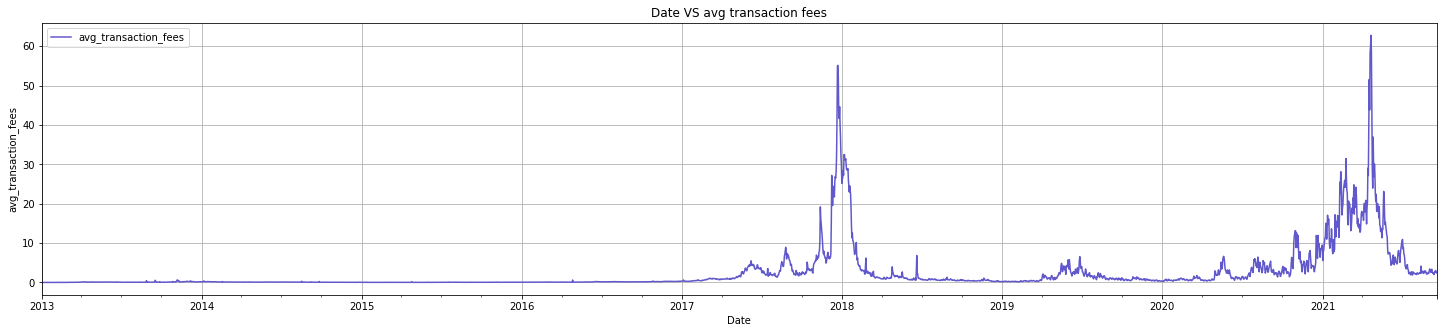

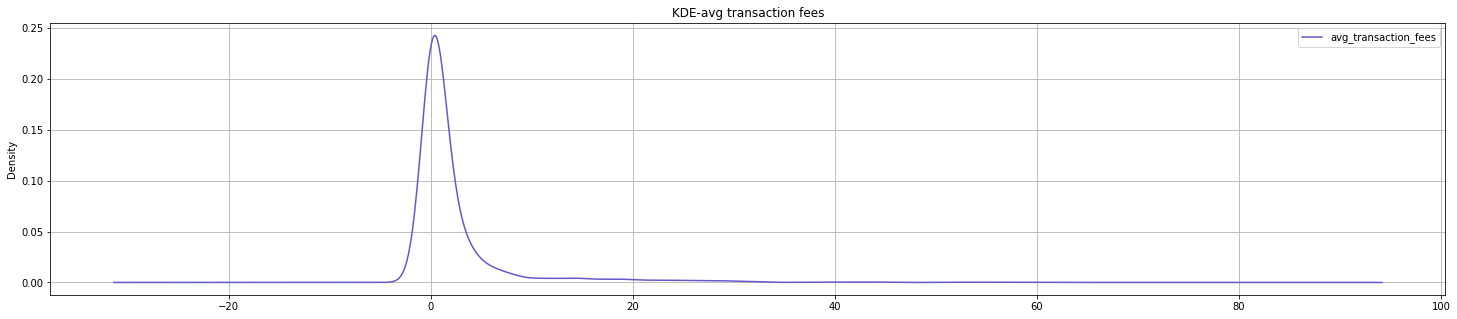

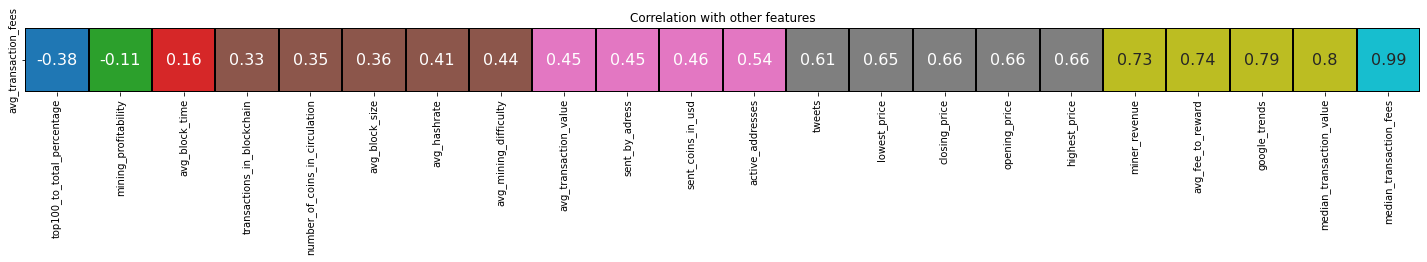

In [22]:
plot_data(df_nxt_cls, feature_name='avg_transaction_fees')

1. Every transaction can have a sender-determined transaction associated with it. The miners verifying the transactionreceive the transaction fee.


2. Transactions with higher fees reward the Bitcoin miners to process them sooner than transactions with lower fees

### Observations
1. The transaction fees paid to miners has very skewed distribution. 

2. Intuitively, it can be understood that as prices increased, the fees also increased

## Tweets

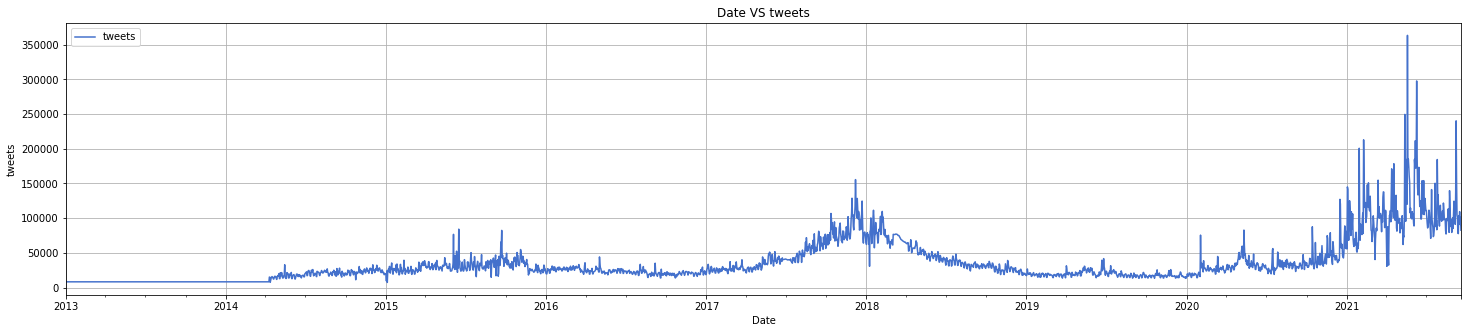

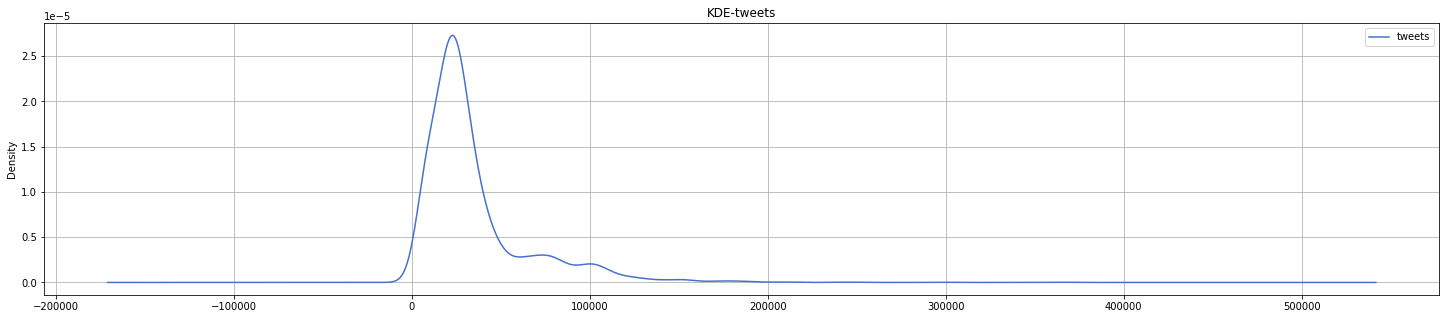

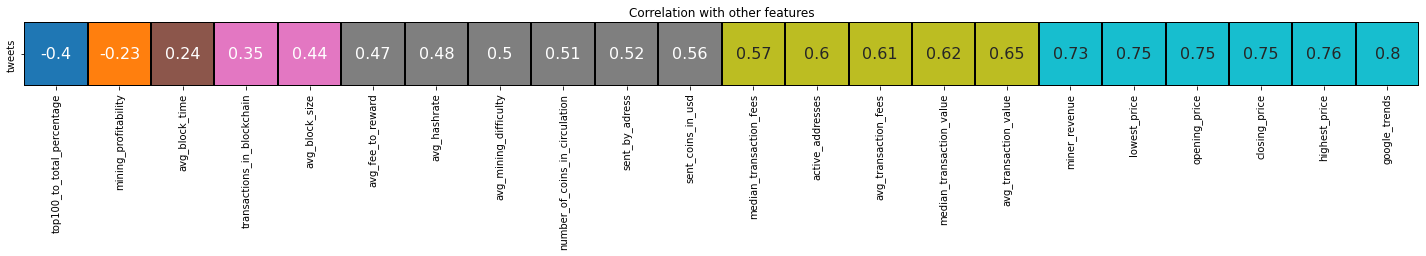

In [23]:
plot_data(df_nxt_cls, feature_name='tweets')

### Observations
As bitcoin is a digital currency, it affects the social media such that if prices increase or as the number of sent coins increase, bitcoin trends on social media.

## Average Fee to Reward ratio

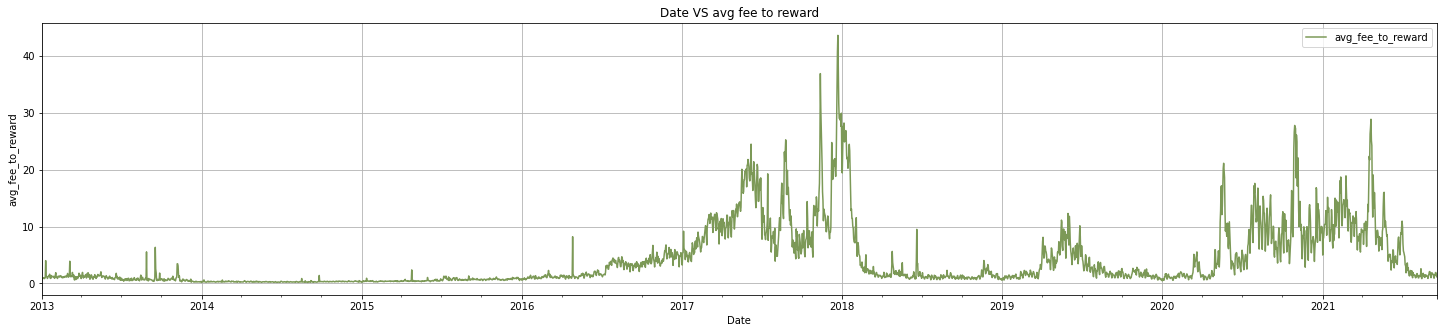

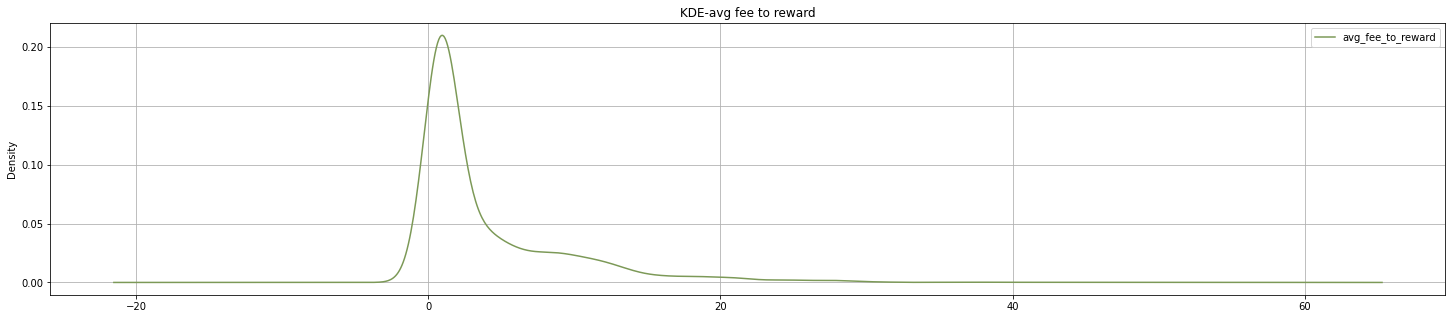

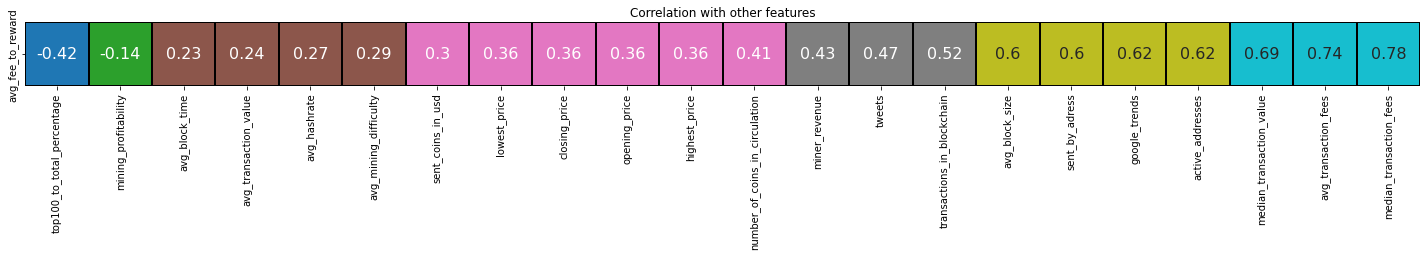

In [24]:
plot_data(df_nxt_cls, feature_name='avg_fee_to_reward')

1. Bitcoin block rewards are new bitcoins awarded to cryptocurrency miners for being the first to solve a complex math problem and creating a new block of verified bitcoin transactions. 

2. It started at 50 BTC and halves every 210,000 blocks. The current reward lies at 6.25.

3. Following feature is the ratio of the fee sent in a transaction to the reward for verifying that transaction by the other users.

### Observations

1. In the period from 2013 to 2016, the reward was 25 bitcoins, but the fees paid are less.

2. From period 2016 to 2020, the reward was reduced to 12.5 BTC. In this period the fees paid are most as where maximum value is around 43% of reward.

3. From June 2020, the rewards were decreased to 6.25. Now the fees paid are less compared to earlier ratio, but the ration increases as the denominator is reduced.


4. The correlation with transaction fees is expected but also can be observed with google trends and number of sent by address.

## Number of coins in Circulation

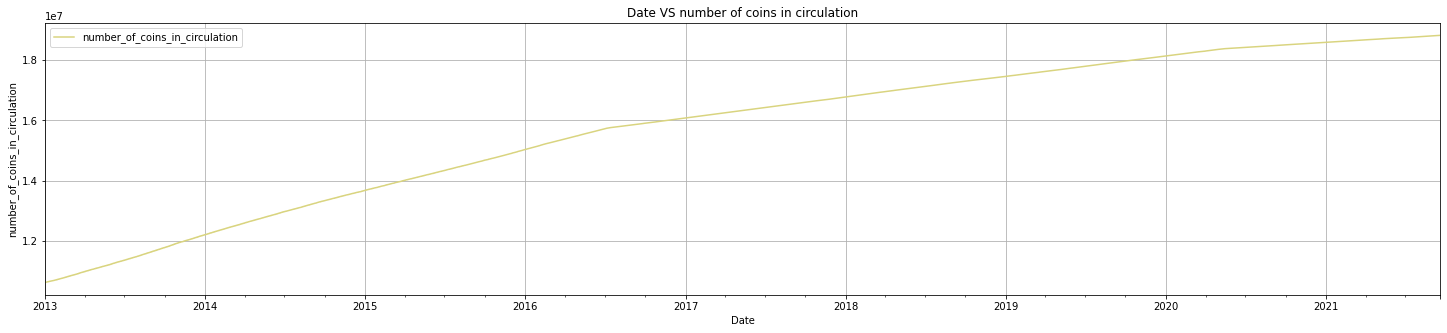

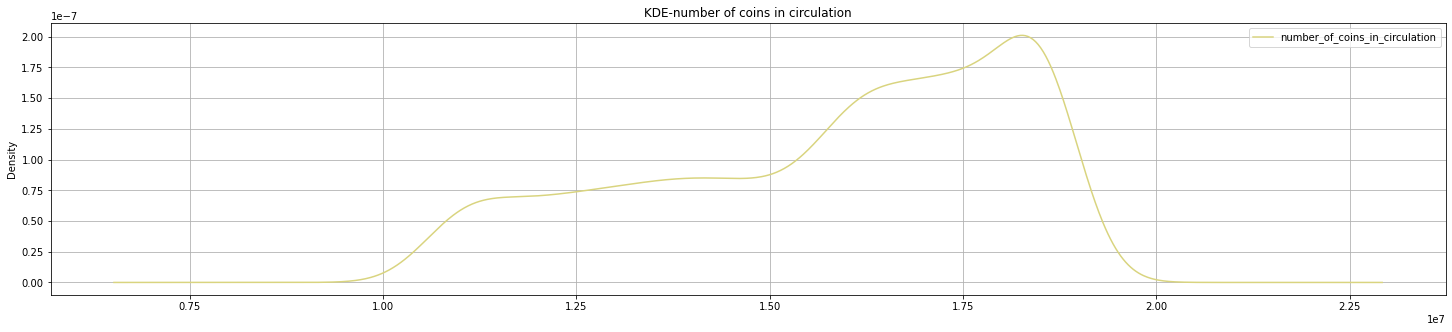

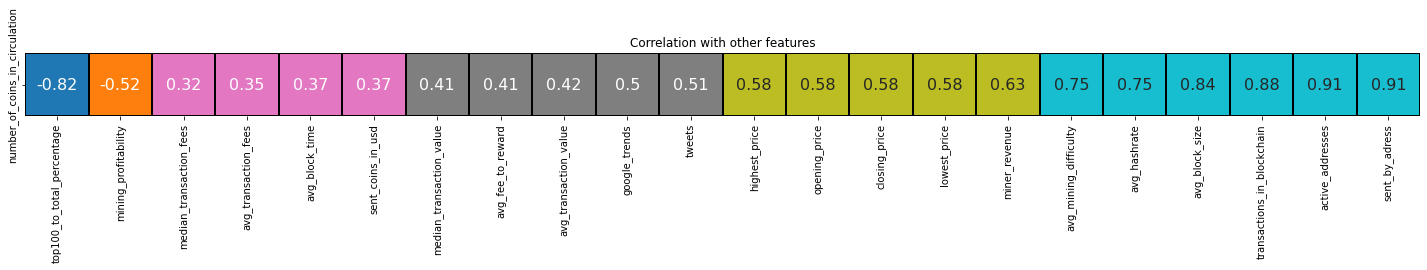

In [25]:
plot_data(df_nxt_cls, feature_name='number_of_coins_in_circulation')

1. The total number of mined bitcoin that are currently circulating on the network.

2. The total supply of BTC is limited and pre-defined in the Bitcoin protocol at 21 million, with the mining reward decreasing over time. This graph shows how many Bitcoins have already been mined or put into circulation.

### Observations

1. This graph shows the supply of bitcoins in the market. 

2. Although the direct correlation is less, but this feature might be helpful in predicting the price as prices directly depend on supply. currently demand is higher than supply so despite higher supply the prices continue to price

In [26]:
def feature_smoothening(df,feature_name,smoothening_type,smoothening_range=[7, 30, 90],show_plot=False,show_original_Feature_in_plot=True):
    if smoothening_type == 'sma':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.sma(df[feature_name],j)
    
    if show_plot == True and show_original_Feature_in_plot==True :
        df[[feature_name]+[i for i in list(df.columns) if i.split(" ")[-1] == feature_name and i.split(" ")[0][0:len(smoothening_type)] == smoothening_type]].plot(kind='line',figsize=(25,5))
        plt.grid()
        plt.title(f'Feature Smoothening-{feature_name} by {smoothening_type}')
        plt.xticks([])
        plt.show()

    elif show_plot == True and show_original_Feature_in_plot==False :
        df[[i for i in list(df.columns) if i.split(" ")[-1] == feature_name and i.split(" ")[0][0:len(smoothening_type)] == smoothening_type]].plot(kind='line',figsize=(25,5))
        plt.grid()
        plt.title(f'Feature Smoothening-{feature_name} by {smoothening_type}')
        plt.xticks([])
        plt.show()

In [27]:
feature_list = [i for i in list(df_nxt_cls.columns) if i not in ['Date', 'next_day_closing_price']]

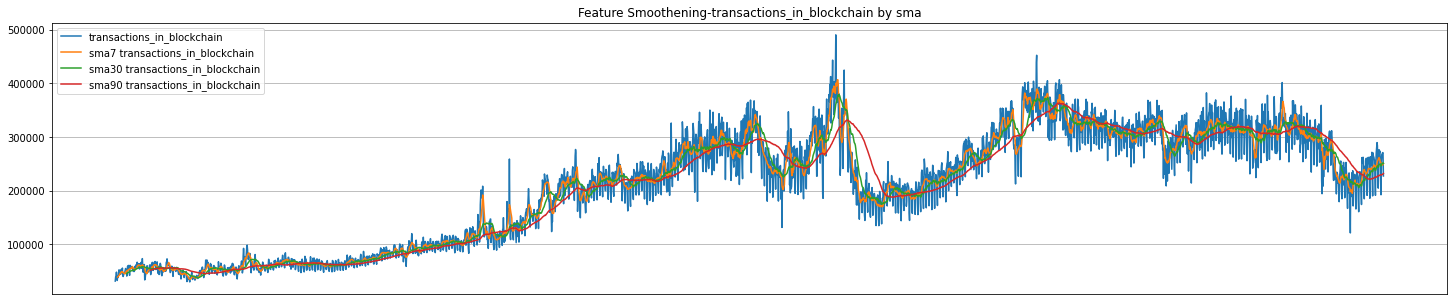

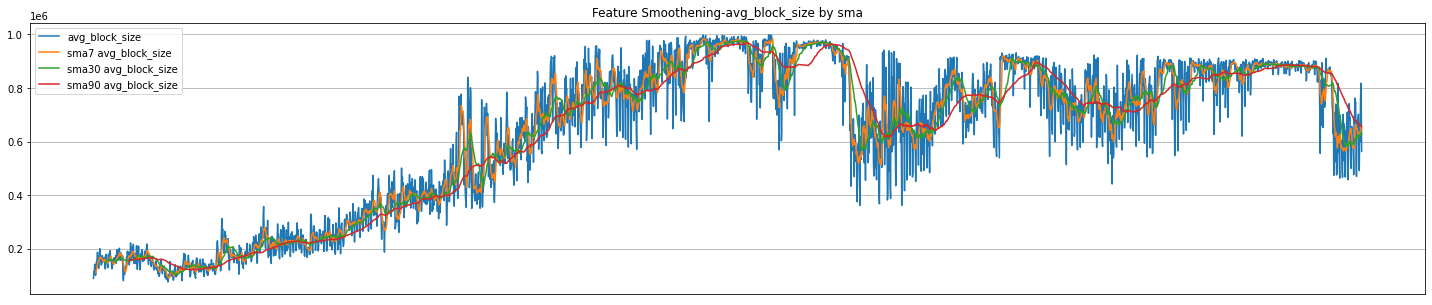

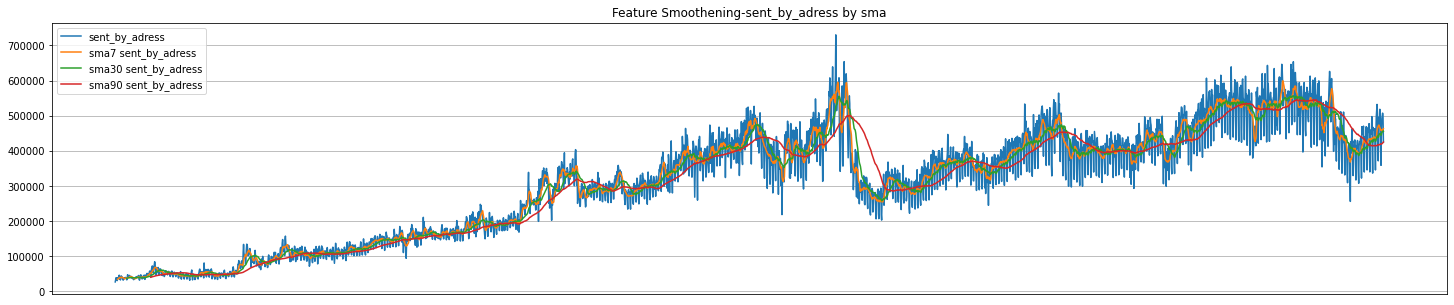

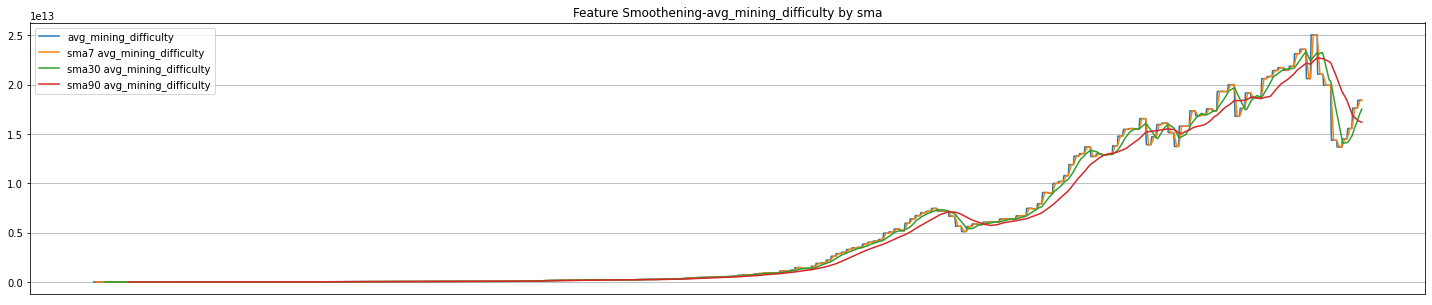

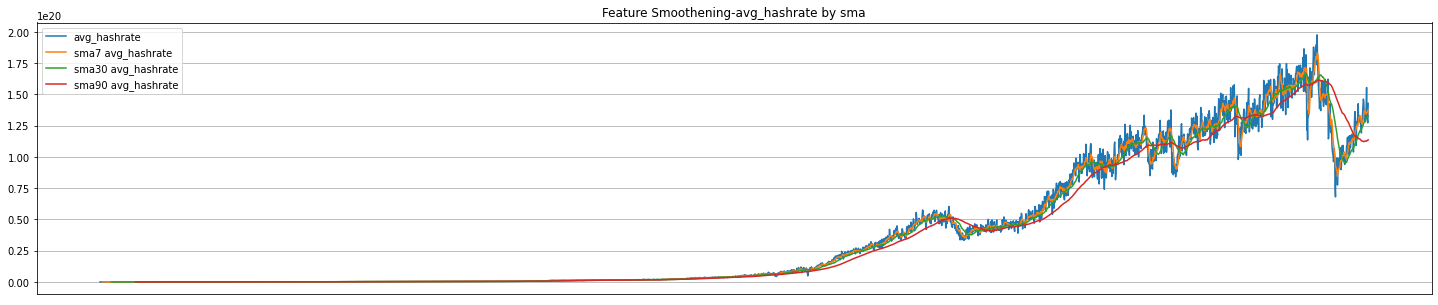

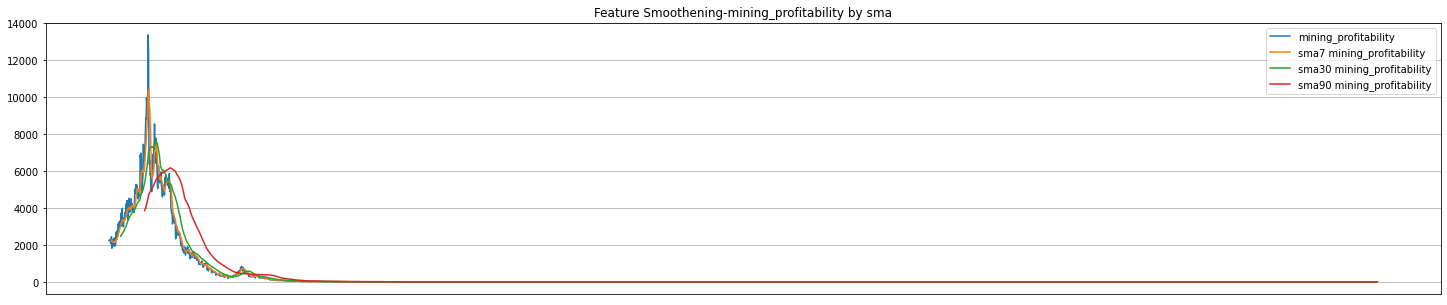

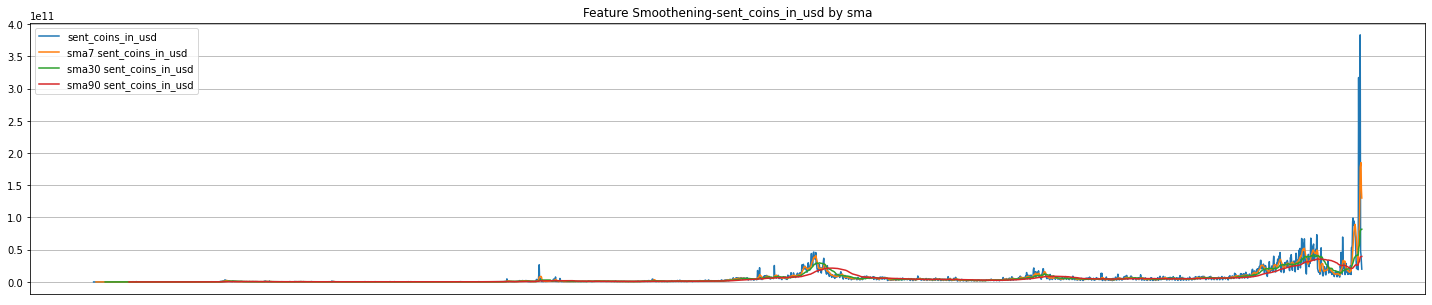

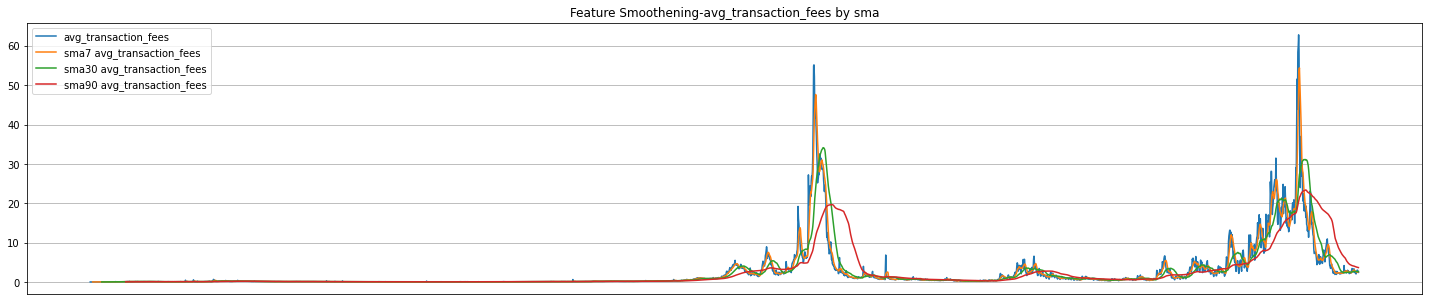

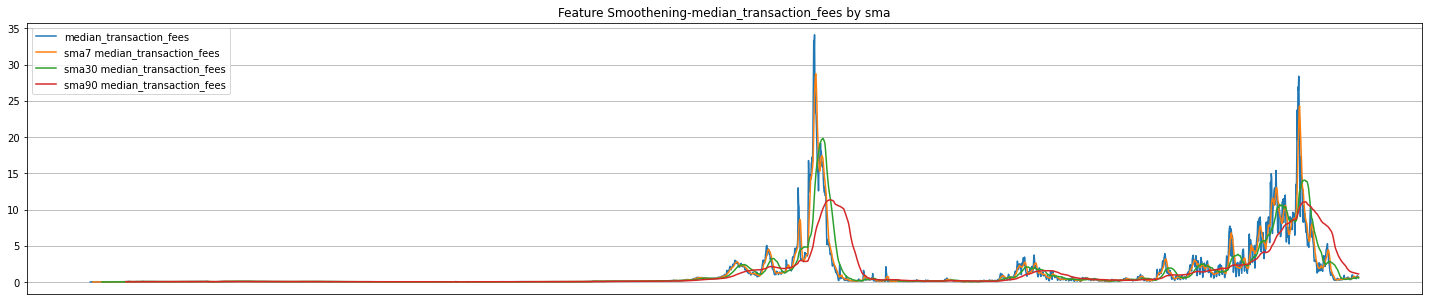

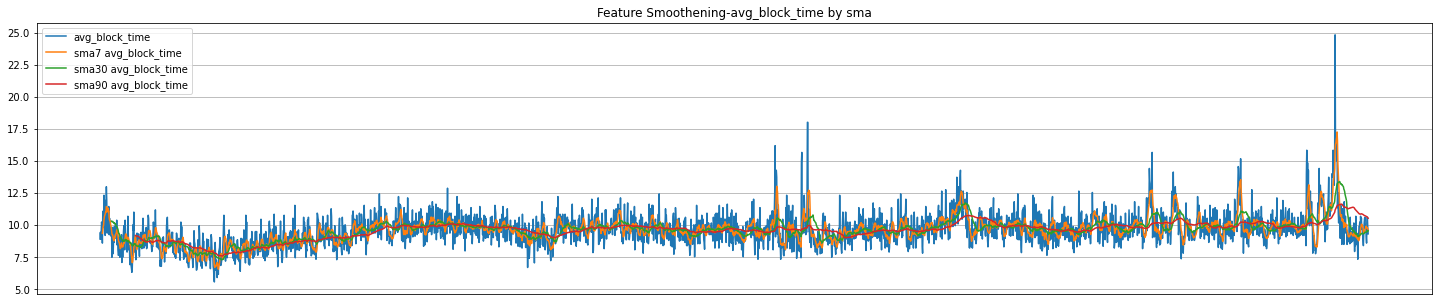

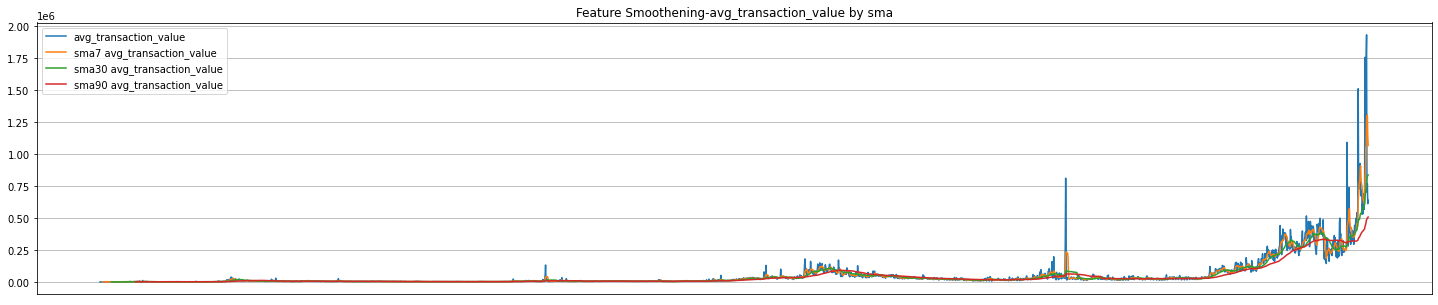

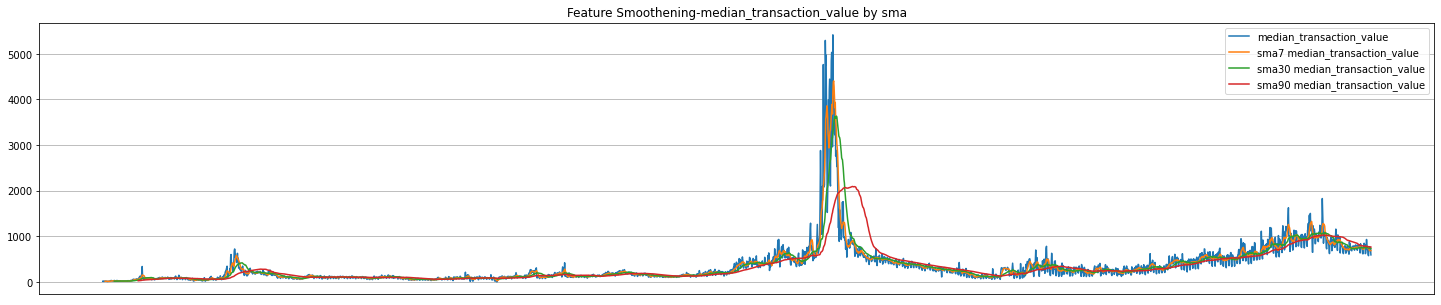

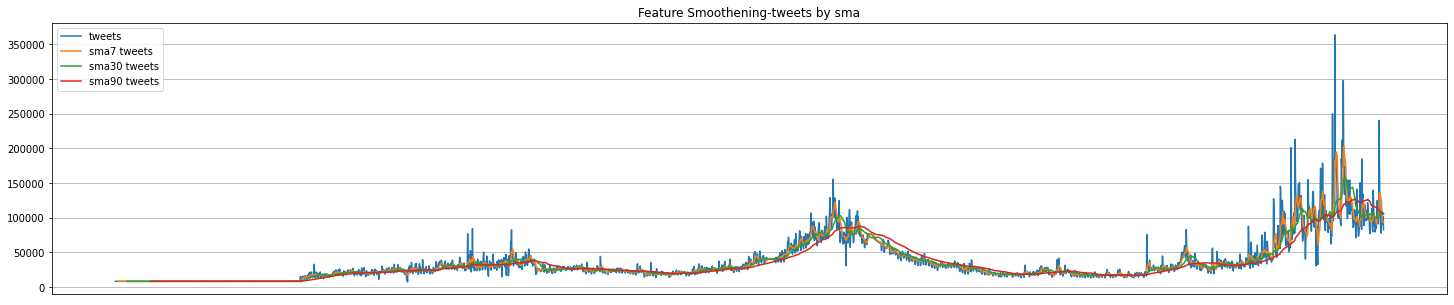

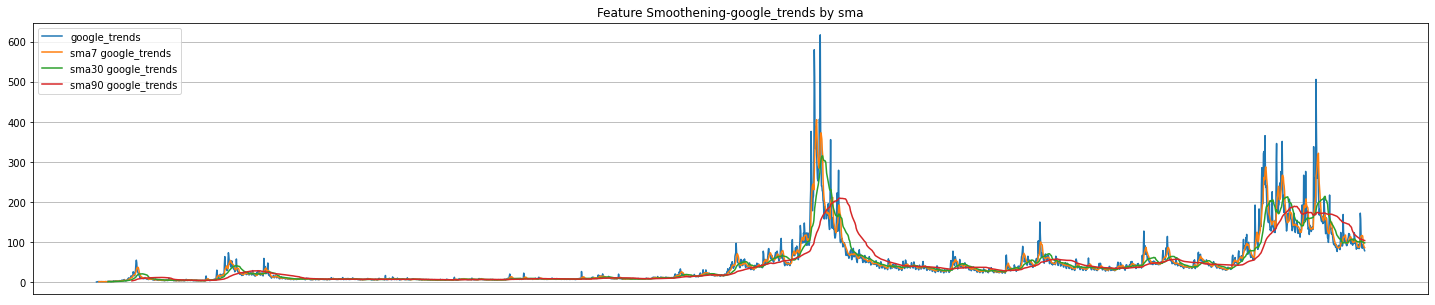

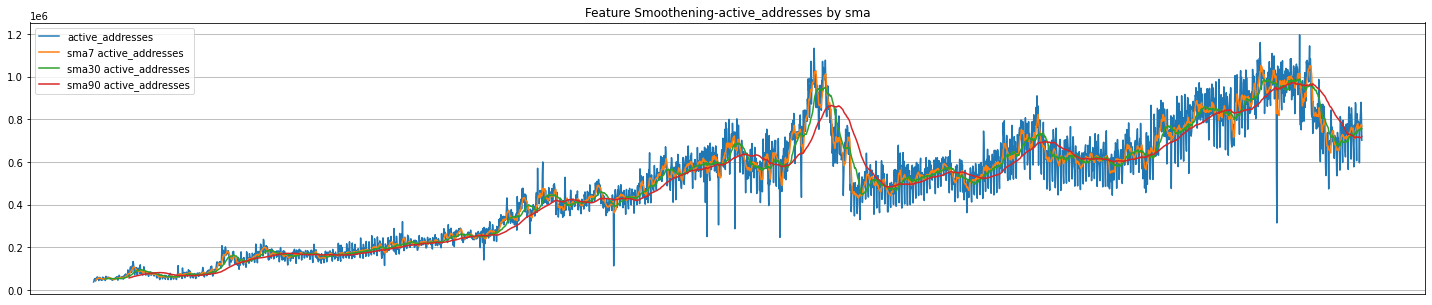

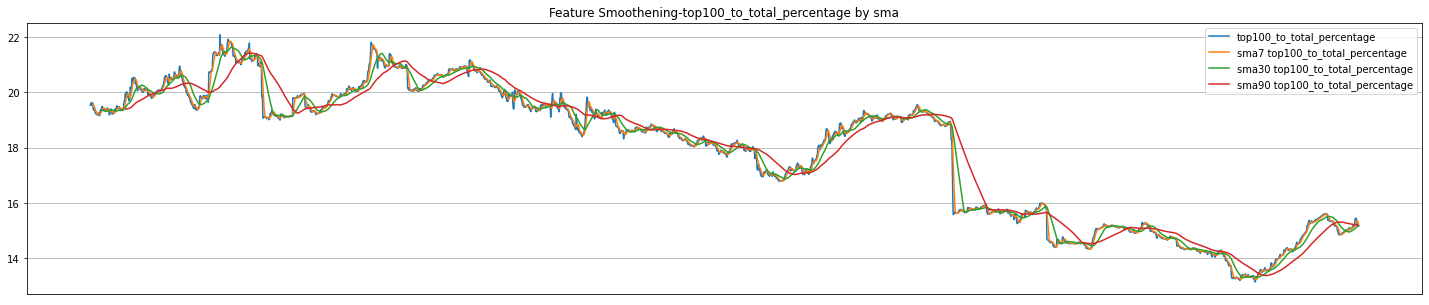

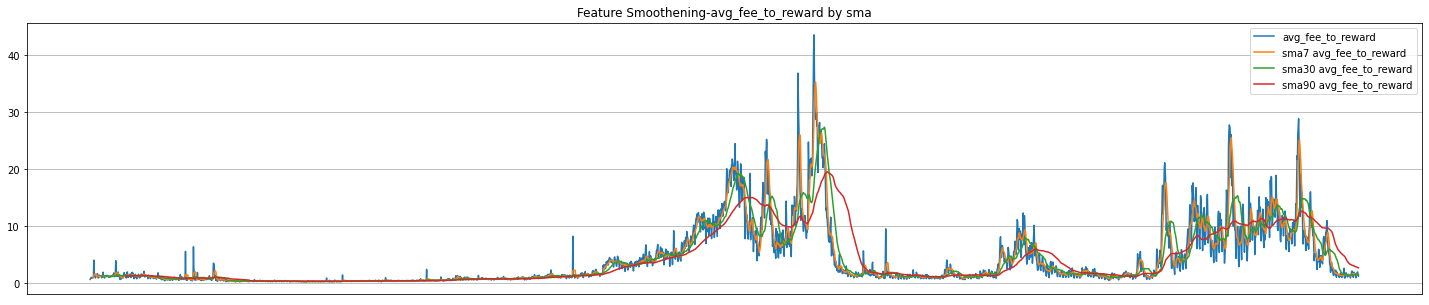

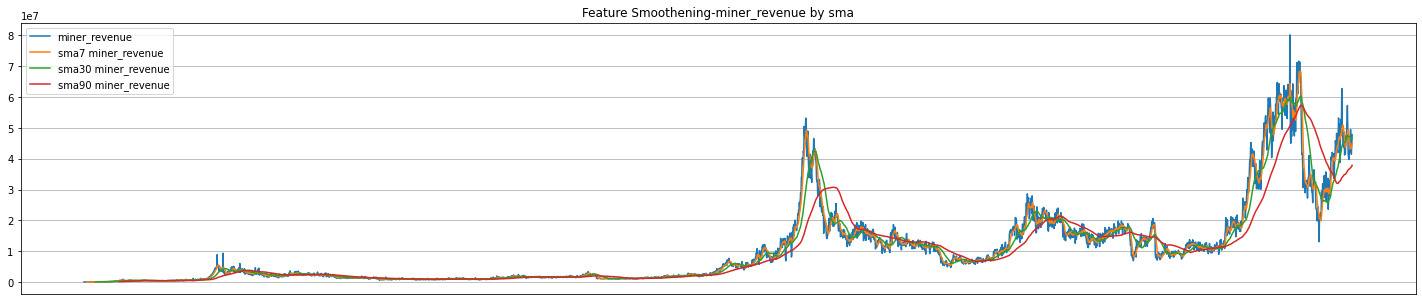

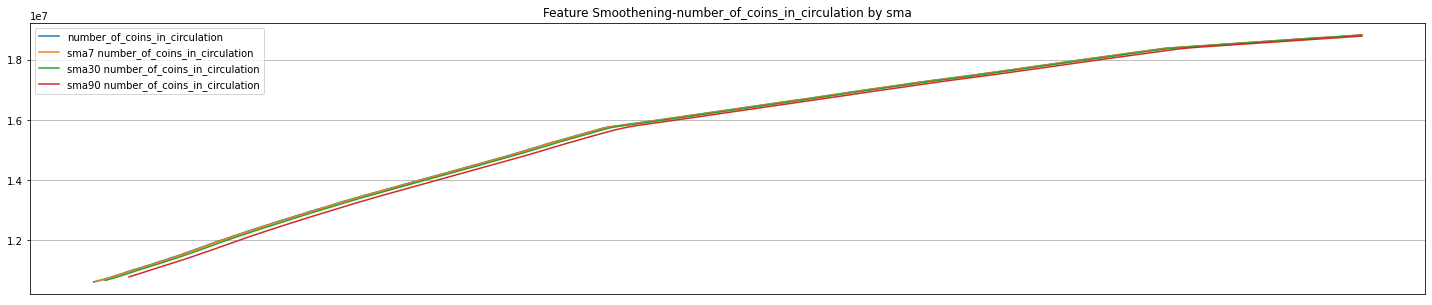

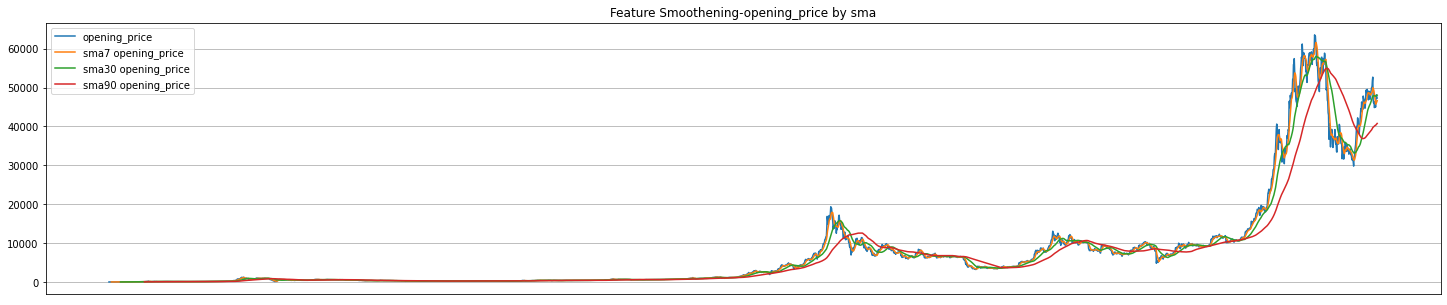

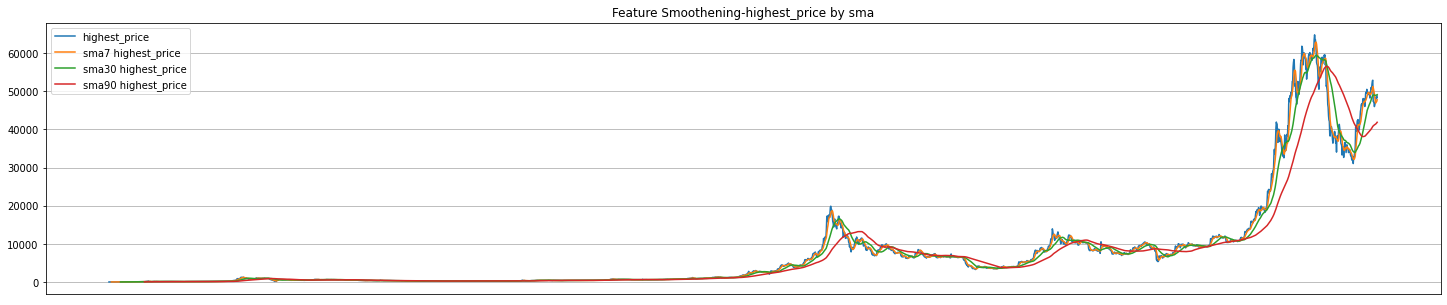

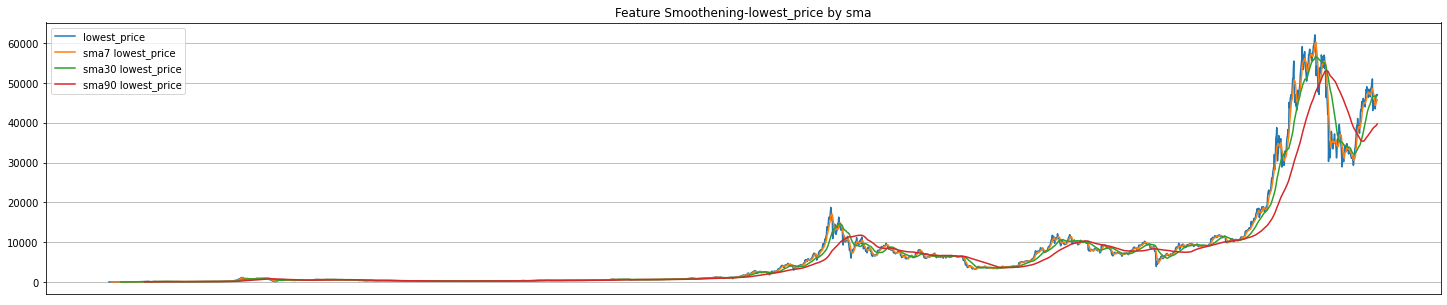

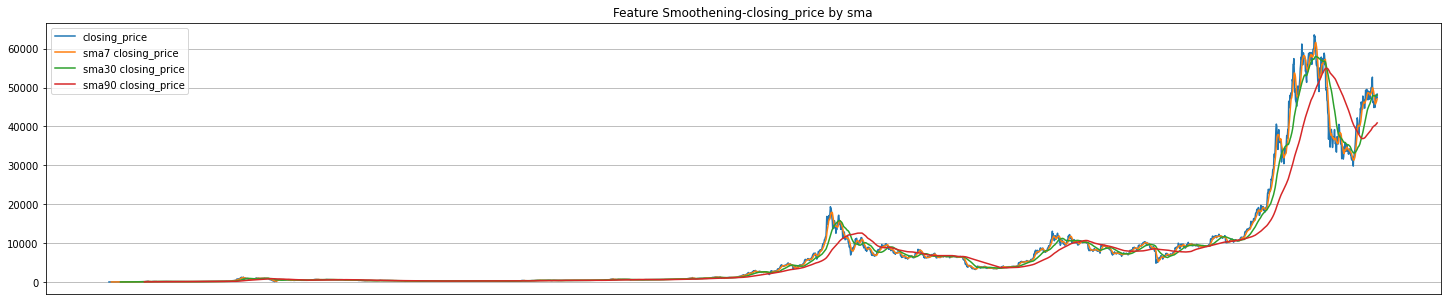

In [28]:
for feature in feature_list:
    feature_smoothening(df_nxt_cls, feature, 'sma', show_plot=True)

In [29]:
df_nxt_cls = df_nxt_cls[(df_nxt_cls['Date'] >= '2013-04-01')].fillna(method='bfill')

In [30]:
df_nxt_cls.shape

(3093, 94)

In [31]:
def feature_imp(df,feat_importance,n_select_features):
    feat_imp_df = pd.DataFrame(data = {"Feature Name": df.columns,"Feature Importance":feat_importance})
    feat_imp_df = feat_imp_df.sort_values("Feature Importance",ascending=False)[:n_select_features]
    return feat_imp_df,df[feat_imp_df['Feature Name']]

In [32]:
X = df_nxt_cls.drop(['Date', 'next_day_closing_price'], axis=1)

scaler = RobustScaler()
X_scaled = X.copy()
X_scaled[X.columns] = scaler.fit_transform(X[X.columns])

scaler = MinMaxScaler()
X_scaled[X.columns] =  scaler.fit_transform(X_scaled[X.columns])
X_scaled

y = df_nxt_cls['next_day_closing_price']
rf = RandomForestRegressor(n_estimators=100,n_jobs=-1,bootstrap=True,
                           verbose=5,random_state=1)
rf.fit(X_scaled,y)

feat_range = list(range(10,60,5))

for i in feat_range:
    feat_imp_df,final_df_next_day = feature_imp(X_scaled,rf.feature_importances_,i)
    final_df_next_day.insert(loc=0, column='Date', value=final_df['Date'])
    final_df_next_day['next_day_closing_price'] = final_df['next_day_closing_price']
    final_df_next_day.to_csv(f'final_df_next_day_{i}.csv',index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58

[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    8.6s


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.6s finished


In [33]:
final_df = pd.read_csv('final_df_next_day_10.csv').reset_index(drop=True)
final_df

,Date,sma90 avg_transaction_value,closing_price,sma7 highest_price,opening_price,sma90 closing_price,sma7 opening_price,highest_price,sma90 highest_price,sma30 lowest_price,sma30 closing_price,next_day_closing_price
0,2013-04-01,0.000000,0.000561,0.000200,0.000388,0.000000,0.000178,0.000479,0.000000,0.000000,0.000000,118.0
1,2013-04-02,0.000082,0.000781,0.000288,0.000561,0.000021,0.000249,0.000671,0.000021,0.000038,0.000048,135.0
2,2013-04-03,0.000169,0.001049,0.000419,0.000781,0.000046,0.000340,0.001113,0.000047,0.000083,0.000105,132.1
3,2013-04-04,0.000248,0.001004,0.000524,0.001049,0.000070,0.000447,0.001037,0.000072,0.000130,0.000158,142.3
4,2013-04-05,0.000328,0.001164,0.000642,0.001004,0.000096,0.000554,0.001080,0.000098,0.000183,0.000216,142.6
...,...,...,...,...,...,...,...,...,...,...,...,...
3088,2021-09-14,0.962009,0.740622,0.745063,0.707069,0.734980,0.742725,0.729064,0.731960,0.821078,0.823346,48130.6
3089,2021-09-15,0.971827,0.757213,0.747610,0.740477,0.737020,0.743414,0.747438,0.733712,0.821709,0.824573,47748.0
3090,2021-09-16,0.982980,0.751185,0.750283,0.757200,0.739449,0.748234,0.748120,0.735741,0.823239,0.826331,47282.8
3091,2021-09-17,0.991883,0.743856,0.752863,0.751149,0.741831,0.751399,0.743102,0.738062,0.824745,0.827803,48306.7


## Metrics

In [34]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_metrics(y, ypred):
    MAE = metrics.mean_absolute_error(y, ypred)
    RMSE = metrics.mean_squared_error(y, ypred,squared=False)
    return MAE,RMSE

def plot_results(y,ypred,title=None):
    plt.figure(figsize=(25,5))
    plt.plot(y,label='actual')
    plt.plot(ypred,label='predicted')
    plt.legend()
    plt.grid()
    plt.title(title)
    plt.show()

## Train Test Split

In [35]:
train_window = 500
test_window = 100
train_splits = []
test_splits = []
for i in tqdm(range(train_window, len(final_df),test_window)):
    train_split = final_df[i-train_window:i]
    test_split = final_df[i:i+test_window]
    train_splits.append(train_split)
    test_splits.append(test_split)

100%|██████████| 26/26 [00:00<00:00, 3076.04it/s]


## Dummy Regressor

In [36]:
dmy_date_array = []
dmy_y_test_array = []
dmy_y_test_pred_array = []
dmy_batch_id_array = []
dmy_batch_id_array_result = []
dmy_batch_mae_train_array = []
dmy_batch_rmse_train_array = []
dmy_batch_mae_test_array = []
dmy_batch_rmse_test_array = []

for i in tqdm(range(len(train_splits))):
    Xtrain_split = train_splits[i].drop(['next_day_closing_price','Date'],axis=1).values
    Xtest_split = test_splits[i].drop(['next_day_closing_price','Date'],axis=1).values

    ytrain_split = train_splits[i]['next_day_closing_price'].reset_index(drop=True).values
    ytest_split = test_splits[i]['next_day_closing_price'].reset_index(drop=True).values

    dmy = DummyRegressor(strategy="quantile",quantile=0.9)
    dmy.fit(Xtrain_split, ytrain_split)

    ytrain_pred = dmy.predict(Xtrain_split)
    ytest_pred = dmy.predict(Xtest_split)

    MAE_train,RMSE_train = calculate_metrics(ytrain_split,ytrain_pred)
    MAE_test,RMSE_test = calculate_metrics(ytest_split,ytest_pred)

    dmy_date_array.extend(test_splits[i]['Date'])
    dmy_y_test_array.extend(test_splits[i]['next_day_closing_price'])
    dmy_y_test_pred_array.extend((ytest_pred.flatten()))
    dmy_batch_id_array.extend([i]*len(test_splits[i]))

    dmy_batch_id_array_result.append(i)
    dmy_batch_mae_train_array.append(MAE_train)
    dmy_batch_rmse_train_array.append(RMSE_train)

    dmy_batch_mae_test_array.append(MAE_test)
    dmy_batch_rmse_test_array.append(RMSE_test)

dmy_result_test_df = pd.DataFrame()
dmy_result_test_df['batch_id'] = dmy_batch_id_array
dmy_result_test_df['Date'] = dmy_date_array
dmy_result_test_df['y_test'] = dmy_y_test_array
dmy_result_test_df['y_test_pred'] = dmy_y_test_pred_array
dmy_y_test_array = dmy_result_test_df['y_test']
dmy_y_test_pred_array = dmy_result_test_df['y_test_pred']
dmy_result_metrics_df = pd.DataFrame()
dmy_result_metrics_df['batch_id'] = dmy_batch_id_array_result
dmy_result_metrics_df['mae_train'] = dmy_batch_mae_train_array
dmy_result_metrics_df['rmse_train'] = dmy_batch_rmse_train_array
dmy_result_metrics_df['mae_test'] = dmy_batch_mae_test_array
dmy_result_metrics_df['rmse_test'] = dmy_batch_rmse_test_array

100%|██████████| 26/26 [00:00<00:00, 298.04it/s]


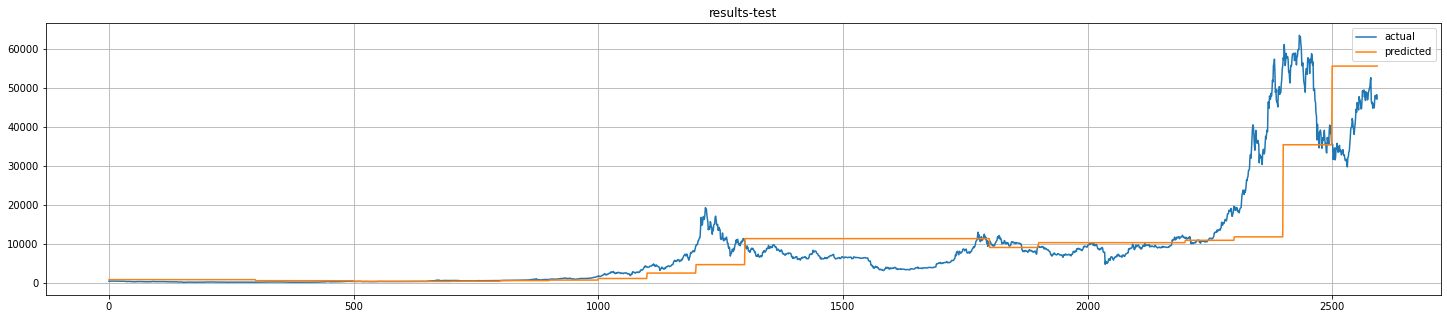

In [37]:
plot_results(dmy_y_test_array,dmy_y_test_pred_array,'results-test')

In [38]:
dmy_result_metrics_df

,batch_id,mae_train,rmse_train,mae_test,rmse_test
0,0,487.3474,553.026372,468.702000,472.806255
1,1,428.1248,483.162929,596.762000,599.566459
2,2,395.9188,436.369625,635.831000,636.131980
3,3,226.0378,265.386831,365.977000,366.677201
4,4,247.4002,277.885432,268.670000,278.820470
5,5,136.3460,150.564699,23.574400,29.933232
6,6,118.8492,138.019818,116.960400,157.998004
7,7,141.6396,164.901662,147.065000,150.198757
8,8,214.8504,253.254182,169.599000,196.934882
9,9,258.1716,297.598905,403.210000,435.652596


In [39]:
pd.DataFrame(dmy_result_metrics_df.mean()).drop(['batch_id'],axis=0)

,0
mae_train,4200.110862
rmse_train,4680.817501
mae_test,3934.811423
rmse_test,4344.393641


## Linear Regressor

In [40]:
lr_date_array = []
lr_y_test_array = []
lr_y_test_pred_array = []
lr_batch_id_array = []
lr_batch_id_array_result = []
lr_batch_mae_train_array = []
lr_batch_rmse_train_array = []
lr_batch_mae_test_array = []
lr_batch_rmse_test_array = []

for i in tqdm(range(len(train_splits))):
    Xtrain_split = train_splits[i].drop(['next_day_closing_price','Date'],axis=1)
    Xtest_split = test_splits[i].drop(['next_day_closing_price','Date'],axis=1)
    ytrain_split = train_splits[i]['next_day_closing_price'].reset_index(drop=True).values
    ytest_split = test_splits[i]['next_day_closing_price'].reset_index(drop=True).values

    sgd_reg = SGDRegressor(loss='squared_epsilon_insensitive',alpha=0.0001,penalty='elasticnet',shuffle=True,
                           tol=0.000001,l1_ratio=0.15,epsilon=0.01,learning_rate='adaptive',max_iter=1000,eta0 =0.01)
    sgd_reg.fit(Xtrain_split, ytrain_split)

    ytrain_pred = sgd_reg.predict(Xtrain_split)
    ytest_pred = sgd_reg.predict(Xtest_split)

    MAE_train,RMSE_train = calculate_metrics(ytrain_split,ytrain_pred)
    MAE_test,RMSE_test = calculate_metrics(ytest_split,ytest_pred)

    lr_date_array.extend(test_splits[i]['Date'])
    lr_y_test_array.extend(test_splits[i]['next_day_closing_price'])
    lr_y_test_pred_array.extend((ytest_pred.flatten()))
    lr_batch_id_array.extend([i]*len(test_splits[i]))

    lr_batch_id_array_result.append(i)
    lr_batch_mae_train_array.append(MAE_train)
    lr_batch_rmse_train_array.append(RMSE_train)
    lr_batch_mae_test_array.append(MAE_test)
    lr_batch_rmse_test_array.append(RMSE_test)

lr_result_test_df = pd.DataFrame()
lr_result_test_df['batch_id'] = lr_batch_id_array
lr_result_test_df['Date'] = lr_date_array
lr_result_test_df['y_test'] = lr_y_test_array
lr_result_test_df['y_test_pred'] = lr_y_test_pred_array
lr_y_test_array = lr_result_test_df['y_test']
lr_y_test_pred_array = lr_result_test_df['y_test_pred']

lr_result_metrics_df = pd.DataFrame()
lr_result_metrics_df['batch_id'] = lr_batch_id_array_result
lr_result_metrics_df['mae_train'] = lr_batch_mae_train_array
lr_result_metrics_df['rmse_train'] = lr_batch_rmse_train_array
lr_result_metrics_df['mae_test'] = lr_batch_mae_test_array
lr_result_metrics_df['rmse_test'] = lr_batch_rmse_test_array

100%|██████████| 26/26 [00:01<00:00, 15.95it/s]


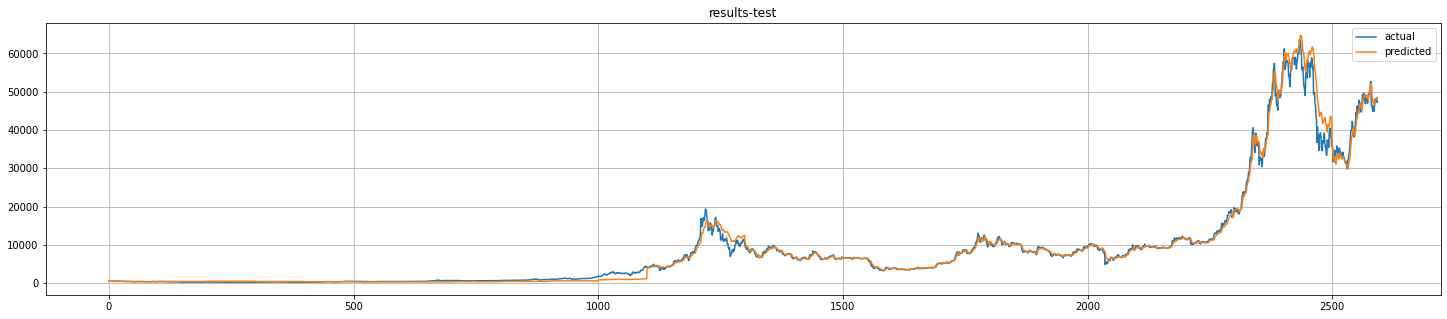

In [41]:
plot_results(lr_y_test_array,lr_y_test_pred_array,'results-test')

In [42]:
lr_result_metrics_df

,batch_id,mae_train,rmse_train,mae_test,rmse_test
0,0,175.756417,206.589789,40.411700,44.197592
1,1,165.012784,209.600072,150.630972,158.194975
2,2,168.891687,213.246479,248.655283,249.379701
3,3,136.073891,161.944295,155.243885,156.878353
4,4,114.375710,135.566531,67.728906,78.417369
5,5,67.432527,79.957046,106.007037,108.160001
6,6,67.335723,75.493765,231.628487,254.830951
7,7,102.129577,123.115968,252.735165,254.560758
8,8,117.271740,142.681501,374.077652,387.025990
9,9,148.868771,174.937932,614.183462,634.794078


In [43]:
pd.DataFrame(lr_result_metrics_df.mean()).drop(['batch_id'],axis=0)

,0
mae_train,249.792713
rmse_train,386.634308
mae_test,643.899533
rmse_test,777.165736


## SVR

In [44]:
svr_date_array = []
svr_y_test_array = []
svr_y_test_pred_array = []
svr_batch_id_array = []
svr_batch_id_array_result = []
svr_batch_mae_train_array = []
svr_batch_rmse_train_array = []
svr_batch_mae_test_array = []
svr_batch_rmse_test_array = []

for i in tqdm(range(len(train_splits))):
    Xtrain_split = train_splits[i].drop(['next_day_closing_price','Date'],axis=1).values
    Xtest_split = test_splits[i].drop(['next_day_closing_price','Date'],axis=1).values

    ytrain_split = train_splits[i]['next_day_closing_price'].reset_index(drop=True).values
    ytest_split = test_splits[i]['next_day_closing_price'].reset_index(drop=True).values

    svr = SVR(C=10000,gamma='auto',kernel='rbf')
    svr.fit(Xtrain_split, ytrain_split)

    ytrain_pred = svr.predict(Xtrain_split)
    ytest_pred = svr.predict(Xtest_split)

    MAE_train,RMSE_train = calculate_metrics(ytrain_split,ytrain_pred)
    MAE_test,RMSE_test = calculate_metrics(ytest_split,ytest_pred)

    svr_date_array.extend(test_splits[i]['Date'])
    svr_y_test_array.extend(test_splits[i]['next_day_closing_price'])
    svr_y_test_pred_array.extend((ytest_pred.flatten()))
    svr_batch_id_array.extend([i]*len(test_splits[i]))

    svr_batch_id_array_result.append(i)
    svr_batch_mae_train_array.append(MAE_train)
    svr_batch_rmse_train_array.append(RMSE_train)
    svr_batch_mae_test_array.append(MAE_test)
    svr_batch_rmse_test_array.append(RMSE_test)

svr_result_test_df = pd.DataFrame()
svr_result_test_df['batch_id'] = svr_batch_id_array
svr_result_test_df['Date'] = svr_date_array
svr_result_test_df['y_test'] = svr_y_test_array
svr_result_test_df['y_test_pred'] = svr_y_test_pred_array
svr_y_test_array = svr_result_test_df['y_test']
svr_y_test_pred_array = svr_result_test_df['y_test_pred']
svr_result_metrics_df = pd.DataFrame()
svr_result_metrics_df['batch_id'] = svr_batch_id_array_result
svr_result_metrics_df['mae_train'] = svr_batch_mae_train_array
svr_result_metrics_df['rmse_train'] = svr_batch_rmse_train_array
svr_result_metrics_df['mae_test'] = svr_batch_mae_test_array
svr_result_metrics_df['rmse_test'] = svr_batch_rmse_test_array

100%|██████████| 26/26 [00:01<00:00, 23.87it/s]


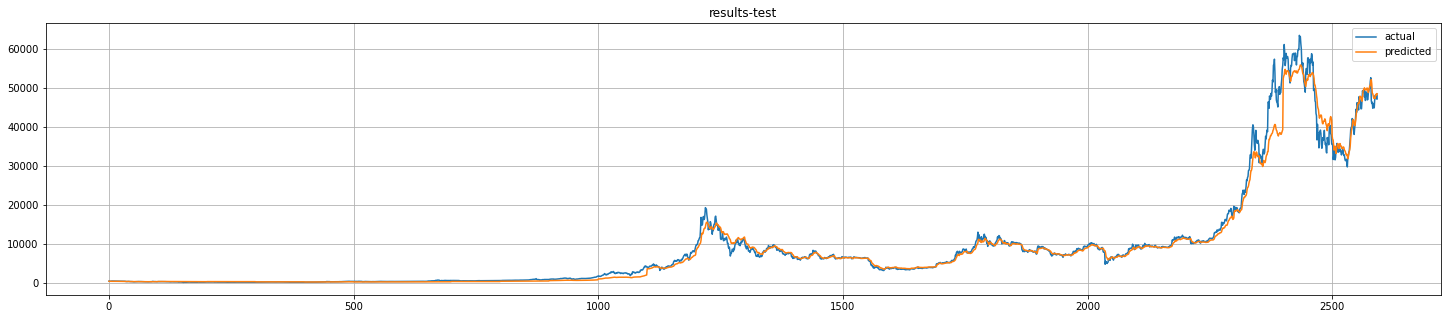

In [45]:
plot_results(svr_y_test_array,svr_y_test_pred_array,'results-test')

In [46]:
svr_result_metrics_df

,batch_id,mae_train,rmse_train,mae_test,rmse_test
0,0,117.519820,153.486271,25.906349,31.990705
1,1,125.499464,163.947145,96.779247,104.210545
2,2,121.274730,163.703974,130.264021,131.078315
3,3,90.133833,114.239855,70.076062,72.679796
4,4,75.476006,104.987246,53.026597,64.050354
5,5,52.675804,69.340590,101.111418,103.379421
6,6,49.151908,60.978979,208.172774,231.250468
7,7,65.783529,91.890582,207.439899,209.409997
8,8,85.276894,105.658004,298.113071,308.370045
9,9,100.802309,126.721076,462.654970,480.086384


In [47]:
pd.DataFrame(svr_result_metrics_df.mean()).drop(['batch_id'])

,0
mae_train,256.616345
rmse_train,413.563665
mae_test,762.398070
rmse_test,938.050678


## Adaboost Regressor

In [48]:
from sklearn.ensemble import AdaBoostRegressor
ada_date_array = []
ada_y_test_array = []
ada_y_test_pred_array = []
ada_batch_id_array = []
ada_batch_id_array_result = []
ada_batch_mae_train_array = []
ada_batch_rmse_train_array = []
ada_batch_mape_train_array = []
ada_batch_mae_test_array = []
ada_batch_rmse_test_array = []
ada_batch_mape_test_array = []
for i in tqdm(range(len(train_splits))):
    Xtrain_split = train_splits[i].drop(['next_day_closing_price','Date'],axis=1)
    Xtest_split = test_splits[i].drop(['next_day_closing_price','Date'],axis=1)
    ytrain_split = train_splits[i]['next_day_closing_price'].reset_index(drop=True).values
    ytest_split = test_splits[i]['next_day_closing_price'].reset_index(drop=True).values

    adam_reg = AdaBoostRegressor(n_estimators=500,
                                learning_rate =0.01,random_state=0)
    adam_reg.fit(Xtrain_split, ytrain_split)

    ytrain_pred = adam_reg.predict(Xtrain_split)
    ytest_pred = adam_reg.predict(Xtest_split)

    MAE_train,RMSE_train = calculate_metrics(ytrain_split,ytrain_pred)
    MAE_test,RMSE_test = calculate_metrics(ytest_split,ytest_pred)

    ada_date_array.extend(test_splits[i]['Date'])
    ada_y_test_array.extend(test_splits[i]['next_day_closing_price'])
    ada_y_test_pred_array.extend((ytest_pred.flatten()))
    ada_batch_id_array.extend([i]*len(test_splits[i]))

    ada_batch_id_array_result.append(i)
    ada_batch_mae_train_array.append(MAE_train)
    ada_batch_rmse_train_array.append(RMSE_train)
    ada_batch_mae_test_array.append(MAE_test)
    ada_batch_rmse_test_array.append(RMSE_test)

ada_result_test_df = pd.DataFrame()
ada_result_test_df['batch_id'] = ada_batch_id_array
ada_result_test_df['Date'] = ada_date_array
ada_result_test_df['y_test'] = ada_y_test_array
ada_result_test_df['y_test_pred'] = ada_y_test_pred_array
ada_y_test_array = ada_result_test_df['y_test']
ada_y_test_pred_array = ada_result_test_df['y_test_pred']
ada_result_metrics_df = pd.DataFrame()
ada_result_metrics_df['batch_id'] = ada_batch_id_array_result
ada_result_metrics_df['mae_train'] = ada_batch_mae_train_array
ada_result_metrics_df['rmse_train'] = ada_batch_rmse_train_array
ada_result_metrics_df['mae_test'] = ada_batch_mae_test_array
ada_result_metrics_df['rmse_test'] = ada_batch_rmse_test_array

100%|██████████| 26/26 [00:37<00:00,  1.43s/it]


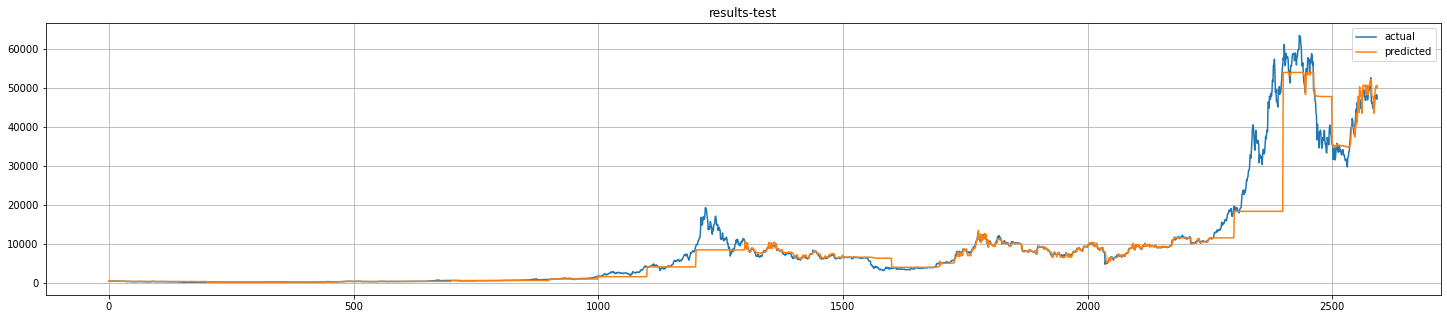

In [49]:
plot_results(ada_y_test_array,ada_y_test_pred_array,'results-test')

In [50]:
ada_result_metrics_df

,batch_id,mae_train,rmse_train,mae_test,rmse_test
0,0,27.194262,40.548809,57.523710,65.697188
1,1,31.519972,43.374214,122.800254,133.407827
2,2,28.204172,40.284016,15.826645,17.793905
3,3,17.984926,26.168487,22.101513,28.162555
4,4,10.628253,13.749185,27.844574,40.879028
5,5,7.952369,10.901145,7.776308,10.884159
6,6,7.200667,9.676905,100.984165,143.889213
7,7,8.851107,11.677438,40.612401,45.611242
8,8,12.520563,15.678882,154.172769,183.594197
9,9,15.059799,20.029902,151.495071,210.784252


In [51]:
pd.DataFrame(ada_result_metrics_df.mean()).drop(['batch_id'],axis=0)

,0
mae_train,206.443127
rmse_train,280.051898
mae_test,1455.850828
rmse_test,1812.036629


## XGboost

In [52]:
import xgboost as xgb
xgb_date_array = []
xgb_y_test_array = []
xgb_y_test_pred_array = []
xgb_batch_id_array = []
xgb_batch_id_array_result = []
xgb_batch_mae_train_array = []
xgb_batch_rmse_train_array = []
xgb_batch_mape_train_array = []
xgb_batch_mae_test_array = []
xgb_batch_rmse_test_array = []
xgb_batch_mape_test_array = []
for i in tqdm(range(len(train_splits))):
    Xtrain_split = train_splits[i].drop(['next_day_closing_price','Date'],axis=1)
    Xtest_split = test_splits[i].drop(['next_day_closing_price','Date'],axis=1)
    ytrain_split = train_splits[i]['next_day_closing_price'].reset_index(drop=True).values
    ytest_split = test_splits[i]['next_day_closing_price'].reset_index(drop=True).values

    xgbm_reg = xgb.XGBRegressor(n_estimators=500,max_depth=3,objective='reg:squarederror',
                                learning_rate =0.01,n_jobs=-1)
    xgbm_reg.fit(Xtrain_split, ytrain_split)

    ytrain_pred = xgbm_reg.predict(Xtrain_split)
    ytest_pred = xgbm_reg.predict(Xtest_split)

    MAE_train,RMSE_train = calculate_metrics(ytrain_split,ytrain_pred)
    MAE_test,RMSE_test = calculate_metrics(ytest_split,ytest_pred)

    xgb_date_array.extend(test_splits[i]['Date'])
    xgb_y_test_array.extend(test_splits[i]['next_day_closing_price'])
    xgb_y_test_pred_array.extend((ytest_pred.flatten()))
    xgb_batch_id_array.extend([i]*len(test_splits[i]))

    xgb_batch_id_array_result.append(i)
    xgb_batch_mae_train_array.append(MAE_train)
    xgb_batch_rmse_train_array.append(RMSE_train)
    xgb_batch_mae_test_array.append(MAE_test)
    xgb_batch_rmse_test_array.append(RMSE_test)

xgb_result_test_df = pd.DataFrame()
xgb_result_test_df['batch_id'] = xgb_batch_id_array
xgb_result_test_df['Date'] = xgb_date_array
xgb_result_test_df['y_test'] = xgb_y_test_array
xgb_result_test_df['y_test_pred'] = xgb_y_test_pred_array
xgb_y_test_array = xgb_result_test_df['y_test']
xgb_y_test_pred_array = xgb_result_test_df['y_test_pred']
xgb_result_metrics_df = pd.DataFrame()
xgb_result_metrics_df['batch_id'] = xgb_batch_id_array_result
xgb_result_metrics_df['mae_train'] = xgb_batch_mae_train_array
xgb_result_metrics_df['rmse_train'] = xgb_batch_rmse_train_array
xgb_result_metrics_df['mae_test'] = xgb_batch_mae_test_array
xgb_result_metrics_df['rmse_test'] = xgb_batch_rmse_test_array

100%|██████████| 26/26 [00:08<00:00,  3.18it/s]


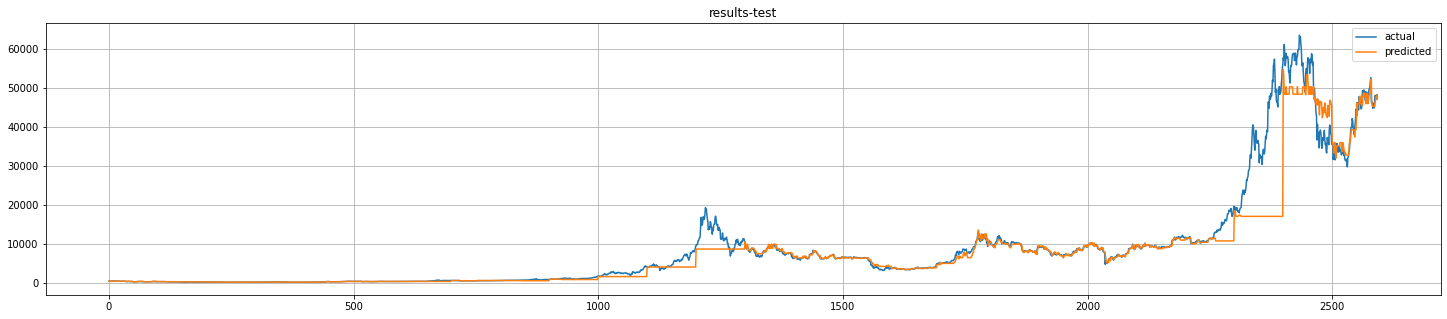

In [53]:
plot_results(xgb_y_test_array,xgb_y_test_pred_array,'results-test')

In [54]:
xgb_result_metrics_df

,batch_id,mae_train,rmse_train,mae_test,rmse_test
0,0,13.018673,24.157332,28.612790,38.734672
1,1,13.944452,24.194216,44.452720,57.174631
2,2,15.052545,24.540320,7.056522,8.542290
3,3,9.265307,14.574928,6.795242,9.304349
4,4,5.918008,8.394457,15.352553,21.812542
5,5,5.524056,7.846036,10.038077,12.549556
6,6,4.966196,6.963888,113.170987,155.417236
7,7,5.236346,7.617009,26.345778,33.349024
8,8,5.759856,8.367568,179.928936,215.469551
9,9,7.577690,11.946419,240.214730,300.952990


In [55]:
pd.DataFrame(xgb_result_metrics_df.mean()).drop(['batch_id'],axis=0)

,0
mae_train,107.024404
rmse_train,172.166928
mae_test,1504.447936
rmse_test,1831.178653
